---
title: 12.2 Data Preprocessing

---

# Data Preprocessing

**Author:** Chao Lu  
**Project title:** INnovative Geothermal Exploration through Novel Investigations Of Undiscovered Systems (INGENIOUS)  
**Affiliation:** University of Nevada, Reno – Nevada Bureau of Mining and Geology (NBMG) and Great Basin Center for Geothermal Energy (GBCGE)  
**Last Modified:** July 3, 2024  
**Program partners:** Aprovechar Lab L3C (L3C) - Stephen Brown; University of Nevada, Reno (UNR) - James Faulds, Maria Richards, Elijah Mlawsky, Cary Lindsey, Nicole Hart-Wagoner

## Introduction


Data preprocessing is a critical step in the machine learning pipeline, ensuring that the dataset is optimized and structured in a way that maximizes the performance of learning algorithms. Before a machine learning model can be trained effectively, the raw data must be cleaned, formatted, and prepared to meet the specific needs of the chosen algorithms. This process not only helps in improving the accuracy of predictions but also in enhancing the efficiency of computational operations.

The primary goal of data preprocessing is to make raw data "machine-readable," addressing any issues that might reduce the effectiveness of a machine learning model. This involves several key steps, each designed to refine the dataset into a more useful form:

1. [**Loading the dataset:**](#loading-the-dataset) The first step involves importing the data from various sources, which could range from flat files like CSVs to databases or even big data storage like HDF5. This stage sets the foundation for all subsequent preprocessing steps.
2. [**Data cleaning and visualization:**](#Data-cleaning-and-visualization) This crucial step involves removing irrelevant data and checking for duplicates to ensure the dataset's integrity. Following this, a preliminary visualization of the dataset is conducted to gain a better understanding of data distributions. Visualization aids in identifying outliers and missing data, which are essential for informing subsequent preprocessing steps. By addressing these issues early, we lay a solid foundation for effective data analysis and model building.
3. [**Labeling the data:**](#labeling-the-data) Before any data manipulation happens, each instance in the dataset is labeled appropriately based on the desired output. This step is crucial for supervised learning models, as it defines the target variable that the model will predict. Labeling ensures that both the training and testing datasets are prepared with clear, definitive outcomes for each entry.
4. [**Splitting the dataset into training and test sets:**](#Splitting-the-dataset-into-training-and-test-sets) To evaluate the performance of a machine learning model reliably, the data are split into training and test sets. The training set is used to train the model, while the test set is used to test its predictive power. This split helps in detecting overfitting and in assessing the generalizability of the model.
5. [**Handling missing data:**](#handling-missing-data) Missing data can significantly distort the predictions of a machine learning model if not addressed appropriately. Depending on the nature and volume of missing data, various techniques may be employed to manage it. These include simple methods such as filling missing values with a constant, mean, median, or mode, as well as more sophisticated techniques like imputation using regression.
6. [**Encoding categorical variables:**](#Encoding-categorical-variables) Machine learning models typically require all input and output variables to be numeric. This necessitates the conversion of categorical data into a numerical format. Common techniques include label encoding, where each category is assigned a unique integer, and one-hot encoding, which converts each categorical value into a new binary column.
7. [**Power transformation:**](#Power-transformation) Power transformations are employed to normalize data distributions, which is advantageous for many machine learning models that require normally distributed features. Common techniques such as the Box-Cox transformation (applicable when all data values are positive) and the Yeo-Johnson transformation help stabilize variance and reduce skewness. These transformations are applied before feature scaling and are essential for improving model performance and convergence in algorithms sensitive to data distribution, like linear regression and neural networks.
8. [**Feature scaling:**](#Feature-scaling) Different features often vary in ranges, and data that are not uniformly scaled can disproportionately influence the model. Feature scaling methods, such as Min-Max scaling or Z-score normalization (standardization), are used to standardize the range of independent variables or features of data.
9. [**Renaming and saving the final data:**](#Renaming-and-saving-the-final-data) After completing all preprocessing steps, it is important to rename the final dataset appropriately and save it for future use. This can involve renaming columns to more meaningful names and saving the final processed data to a file format such as HDF5 (.h5). This step ensures that the data is readily available and properly organized for subsequent analysis or modeling.

<a id="loading-the-dataset"></a>
## 1. Loading the dataset

**Importing libraries**  
At the beginning of this section, we will import the necessary libraries that are essential for our data analysis and visualization tasks. These libraries include:

In [1]:
import pandas as pd
import os
import folium
from pyproj import Transformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
# Define random state (User option)
seed = 88

**Reading your data file**  
In this section, we will load the dataset required for our analysis. First, specify your custom directory as shown below, adjusting the path to point to the location where your data file is stored. The filename is defined separately, and the path is combined with the filename to facilitate data loading.

For this example, our data file is in the `.h5` format, so we utilize the `read_hdf` function to read the file. The data are then stored in a DataFrame named `df_raw`. To verify that the data has been loaded correctly, we display the first few rows of the DataFrame:

In [2]:
# Uncomment the line below to use the current working directory
# path = '.'

# Uncomment and modify the line below to specify a different directory (user option)
path = r'C:\Users\chaolu\Project folder\INGENIOUS\Playbook\workplace\data preprocessing'
# Specify the name of the data file to be read (user option)
filename1 = 'PFA_grid_202103.h5'
# Construct the full file path
file_path = os.path.join(path, filename1)
# Read the data file into a DataFrame
df_raw = pd.read_hdf(file_path)
# Display the first few rows of the DataFrame to verify it's loaded correctly
df_raw.head()

,row,column,id_rc,X_83UTM11,Y_83UTM11,NullInfo,TrainCodeNeg,TrainCodePos,TrainCodePosT130,PosSite130_Id,...,GeodeticStrainRate_Error,QuaternarySlipRate_Error,FaultRecency_Error,Earthquakes_Error,Heatflow_Error,HorizGravityGradient2_Confidence,HorizMagneticGradient2_Confidence,Hillshade-100m,DEM-30m,Fairway
0,0.0,0.0,R1C1,286327.690182,4.258714e+06,notNull,12,12,12,9,...,1.37717,0.466905,0.235299,0.297520,26.295500,0.216451,-9999,218,2055,38.837200
1,0.0,1.0,R1C2,286577.690182,4.258714e+06,notNull,12,12,12,9,...,1.37792,0.466905,0.235299,0.297462,26.267799,0.216451,-9999,160,2014,38.838699
2,0.0,2.0,R1C3,286827.690182,4.258714e+06,notNull,12,12,12,9,...,1.37867,0.467120,0.235412,0.297228,26.240801,0.216451,-9999,189,1934,38.991001
3,0.0,3.0,R1C4,287077.690182,4.258714e+06,notNull,12,12,12,9,...,1.37942,0.467764,0.235751,0.297462,26.214800,0.216451,-9999,164,1951,39.106602
4,0.0,4.0,R1C5,287327.690182,4.258714e+06,notNull,12,12,12,9,...,1.38017,0.468836,0.236314,0.297579,26.189800,0.216451,-9999,219,1986,39.144600


**Basic review of the data**  
To begin our data preprocessing, it's essential to first understand the structure of the dataset. This involves examining key aspects such as the dimensions of the data and the types of data contained within it. Understanding the number of rows and columns helps us gauge the volume and complexity of our data, which is crucial for subsequent processing steps. This can be done using:

In [3]:
df_raw.shape

(1728000, 54)

Understanding the types of data we are working with (e.g., integers, floats, strings) is crucial for effective preprocessing. Different data types may necessitate varied treatments, particularly in terms of encoding methods and handling missing values. Most machine learning models accept only *numeric data*; therefore, depending on your raw data types, a data type transformation may be required. We can identify the data types of each column using the following command:

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1728000 entries, 0 to 1727999
Data columns (total 54 columns):
 #   Column                                   Dtype  
---  ------                                   -----  
 0   row                                      float64
 1   column                                   float64
 2   id_rc                                    object 
 3   X_83UTM11                                float64
 4   Y_83UTM11                                float64
 5   NullInfo                                 object 
 6   TrainCodeNeg                             int64  
 7   TrainCodePos                             int64  
 8   TrainCodePosT130                         int64  
 9   PosSite130_Id                            int64  
 10  PosSite130_Distance                      float64
 11  PosSite_Id                               int64  
 12  PosSite_Distance                         float64
 13  NegSite_Id                               int64  
 14  NegSite_Distance  

<a id="Data-cleaning-and-visualization"></a>
## 2. Data cleaning and visualization
In this step, we will remove irrelevant data and check for duplicates. Additionally, we will briefly visualize the dataset to better understand data distributions. This will help identify outliers and missing data for further processing. Data cleaning and visualization at an early stage are crucial because they ensure the accuracy and quality of the data, providing a solid foundation for any subsequent analysis.

**Check and remove duplicates**  
Based on the initial review of the raw data, we quickly identified that the *'id_rc'*, *'X_83UTM11'*, and *'Y_83UTM11'* columns can be used to identify duplicates. First, we will check if there are any duplicates in the *'id_rc'* column.

In [5]:
# Check for duplicates based on specific columns (user option)
duplicates = df_raw[df_raw.duplicated(subset=['id_rc'], keep=False)]
# Report the number of duplicates found
num_duplicates = duplicates.shape[0] // 2  # Each duplicate pair is counted twice, so divide by 2
# Display the duplicates and the number of duplicates found
print("Duplicates based on 'id_rc':")
print(duplicates)
print(f"\nNumber of duplicate rows found: {num_duplicates}")

Duplicates based on 'id_rc':
Empty DataFrame
Columns: [row, column, id_rc, X_83UTM11, Y_83UTM11, NullInfo, TrainCodeNeg, TrainCodePos, TrainCodePosT130, PosSite130_Id, PosSite130_Distance, PosSite_Id, PosSite_Distance, NegSite_Id, NegSite_Distance, Local_polygon_Id, Local_polygon_overlap_Id, Local-StructuralSetting, Local-QuaternaryFaultRecency, Local-QuaternaryFaultSlipDilation, Local-QuaternaryFaultSlipRate, QuaternaryFaultTraces, GeodeticStrainRate, QuaternarySlipRate, FaultRecency, FaultSlipDilationTendency2, Earthquakes, HorizGravityGradient2, HorizMagneticGradient2, GravityDensity, MagneticDensity, Heatflow, GeochemistryTemperature2, Tufa_Distance, Travertine_Distance, Silica_Distance, TufaOrTravertine_Distance, FavorableStructuralSettings_Distance, Local-StructuralSetting_Error, Local-QuaternaryFaultRecency_Error, Local-QuaternaryFaultSlipDilation_Error, Local-QuaternaryFaultSlipRate_Error, QuaternaryFaultTraces_Error, HorizGravityGradient_Error, GeodeticStrainRate_Error, Quater

There are no duplicates in the *'id_rc'* column. Now, let's check the combination of the *'X_83UTM11'* and *'Y_83UTM11'* columns to verify that there are no duplicates. The results, shown below, indicate that there are no duplicates in our dataset.

In [6]:
# Check for duplicates based on specific columns (user option)
duplicates = df_raw[df_raw.duplicated(subset=['X_83UTM11', 'Y_83UTM11'], keep=False)]
# Report the number of duplicates found
num_duplicates = duplicates.shape[0] // 2  # Each duplicate pair is counted twice, so divide by 2
# Display the duplicates and the number of duplicates found
print("Duplicates based on 'X_83UTM11', and 'Y_83UTM11':")
print(duplicates)
print(f"\nNumber of duplicate rows found: {num_duplicates}")

Duplicates based on 'X_83UTM11', and 'Y_83UTM11':
Empty DataFrame
Columns: [row, column, id_rc, X_83UTM11, Y_83UTM11, NullInfo, TrainCodeNeg, TrainCodePos, TrainCodePosT130, PosSite130_Id, PosSite130_Distance, PosSite_Id, PosSite_Distance, NegSite_Id, NegSite_Distance, Local_polygon_Id, Local_polygon_overlap_Id, Local-StructuralSetting, Local-QuaternaryFaultRecency, Local-QuaternaryFaultSlipDilation, Local-QuaternaryFaultSlipRate, QuaternaryFaultTraces, GeodeticStrainRate, QuaternarySlipRate, FaultRecency, FaultSlipDilationTendency2, Earthquakes, HorizGravityGradient2, HorizMagneticGradient2, GravityDensity, MagneticDensity, Heatflow, GeochemistryTemperature2, Tufa_Distance, Travertine_Distance, Silica_Distance, TufaOrTravertine_Distance, FavorableStructuralSettings_Distance, Local-StructuralSetting_Error, Local-QuaternaryFaultRecency_Error, Local-QuaternaryFaultSlipDilation_Error, Local-QuaternaryFaultSlipRate_Error, QuaternaryFaultTraces_Error, HorizGravityGradient_Error, GeodeticStr

**Remove null data**  
In the previous `df_raw` DataFrame, there is a column named *'NullInfo'*. This column indicates the presence of null data. If the value in the *'NullInfo'* column is *nullValue*, we will mark and remove the entire row. Below is the code and results. We identified 30,528 null rows and removed them from `df_raw`. The result is saved in a new DataFrame, `df_noNull`.

In [7]:
# Identify the indices of rows with 'nullValue' in the 'NullInfo' column
null_indices = df_raw[df_raw['NullInfo'] == 'nullValue'].index
# Print the number of null rows
print(f"Number of null rows: {len(null_indices)}")

Number of null rows: 30528


In [8]:
# Drop the rows with 'nullValue' and create a new DataFrame without these rows
df_noNull = df_raw.drop(null_indices)
df_noNull.shape

(1697472, 54)

**Remove irrelevant data**  
For our current project, the original dataset comprises 54 columns. However, not all of these columns are pertinent to determine the presence of a geothermal system. We have selected 20 relevant columns that are most likely to effectively influence our model's predictions. These columns provide meaningful and actionable insights, excluding less useful data such as row numbers, column numbers, and coordinates—unless they are directly relevant to the context of the analysis.

In this initial process, we removed irrelevant data, retaining only the relevant features. Moving forward, we may further refine our feature set, potentially reducing the number of features even more based on advanced selection techniques. This process will be detailed in a dedicated chapter `[]` designed to introduce and apply feature selection methods specifically tailored to our machine learning project. Furthermore, to prevent data leakage, feature selection will be performed after splitting the data, using only the training data for this purpose.

The selected features encompass a range of geological, geophysical, and geochemical indicators that are essential for understanding geothermal activity. Below are the features we have selected:

In [9]:
# Define your feature columns (user option)
feature_names = ['Local-StructuralSetting', 'Local-QuaternaryFaultRecency', 'Local-QuaternaryFaultSlipDilation', 'Local-QuaternaryFaultSlipRate', \
                 'QuaternaryFaultTraces', 'GeodeticStrainRate', 'QuaternarySlipRate', 'FaultRecency', \
                 'FaultSlipDilationTendency2', 'Earthquakes', 'HorizGravityGradient2', 'HorizMagneticGradient2', \
                 'GravityDensity', 'MagneticDensity', 'Heatflow', 'GeochemistryTemperature2', \
                 'Silica_Distance', 'TufaOrTravertine_Distance', 'FavorableStructuralSettings_Distance', 'DEM-30m']
# Select the feature columns from the DataFrame
df_features = df_noNull[feature_names]

Please note that the selected features have been stored in a new DataFrame named `df_features`. You can view the dimensions of this DataFrame using the following command:

In [10]:
df_features.shape

(1697472, 20)

**Data visualization**  
In this section, we will visualize the distribution of each feature in our dataset. This helps us understand the data better, identify patterns, and detect potential outliers. We will use histograms to display the distributions.
First, we will check the total number of features in the dataset. We will create subplots to accommodate the visualizations, arranging them in rows and columns for better readability.  
While we have a total of 1,697,472 data points (as indicated by `df_features.shape`), creating histograms for the entire dataset can be computationally expensive and result in cluttered visualizations that are difficult to interpret. We will randomly sample 10,000 data points from the dataset to ensure the sample reflects the overall distribution of the data.

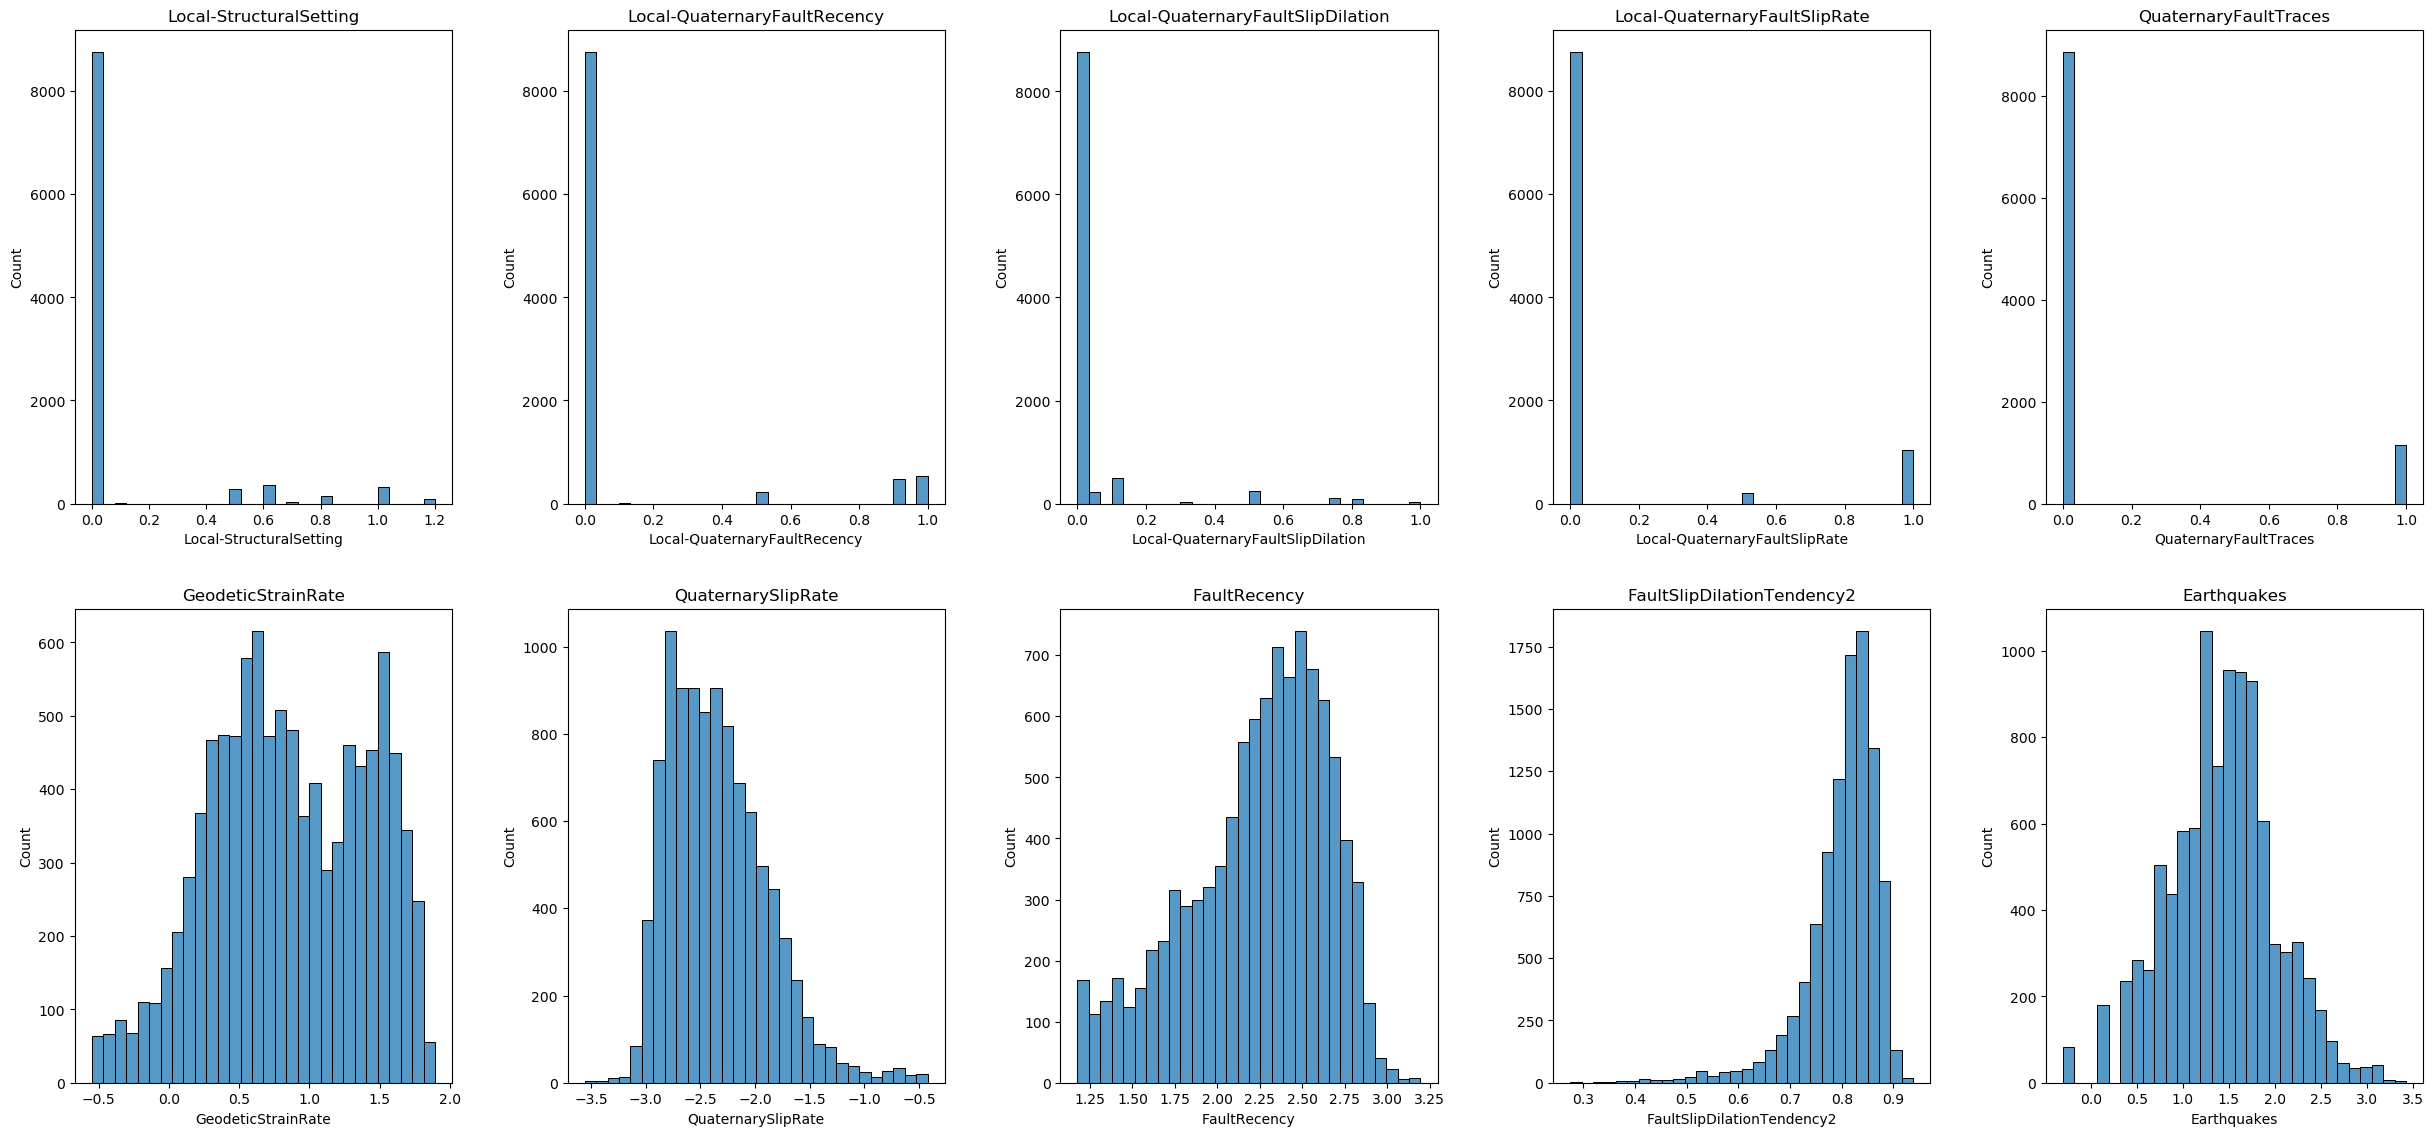

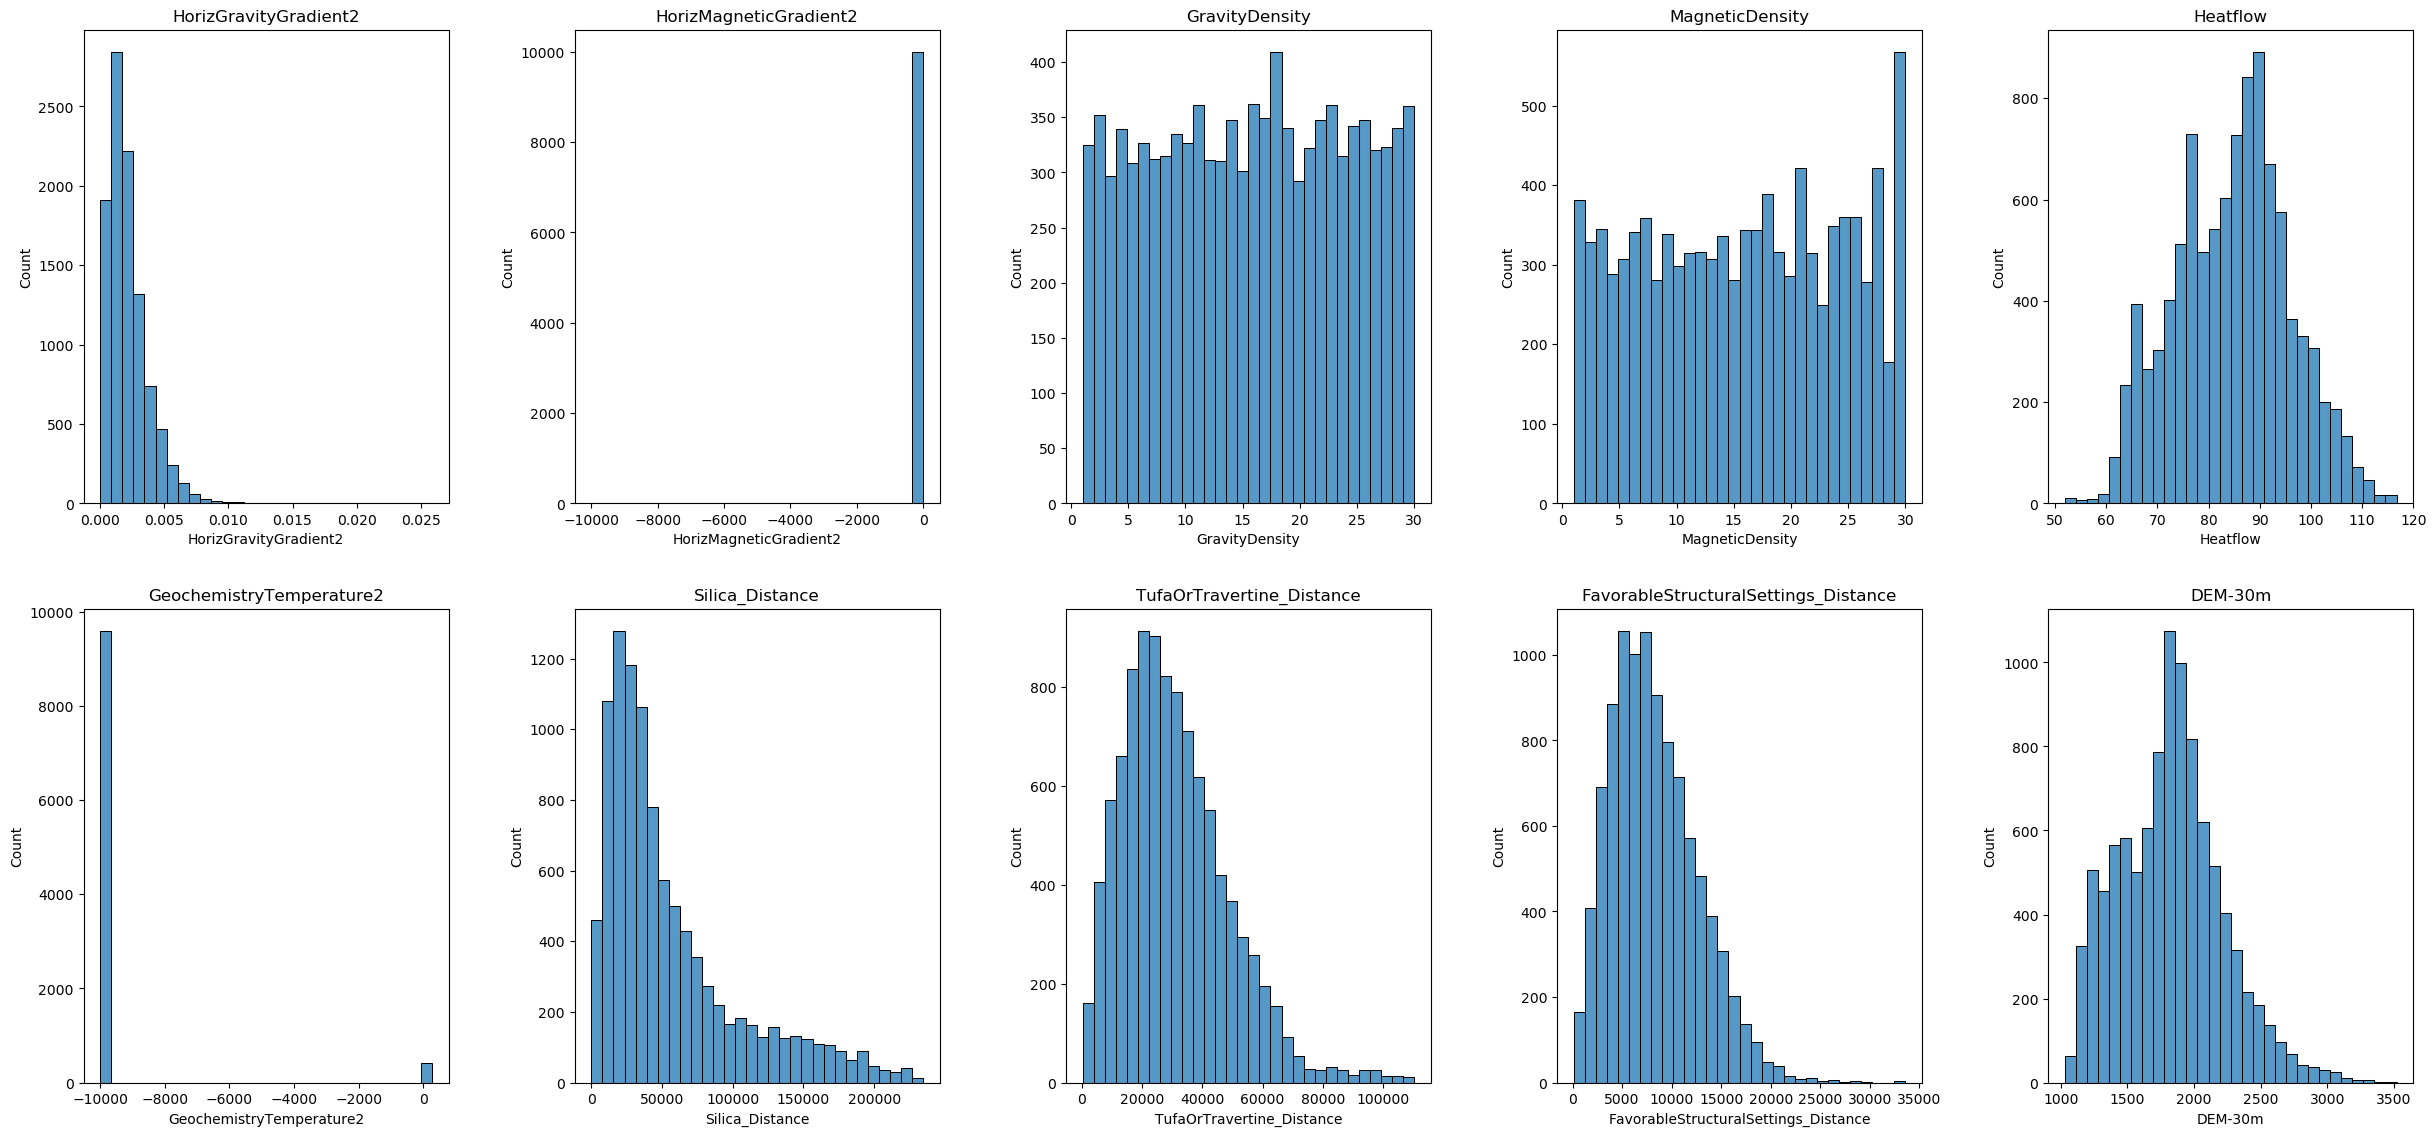

In [11]:
# Checking the total number of features
num_features = df_features.shape[1]  # Total number of features
n_figure = 5  # Subfigures in a row
n_rows_first_fig = 2  # Number of rows in the first figure

# Calculate rows for each figure
num_rows_first = n_rows_first_fig * n_figure
num_rows_second = (num_features - num_rows_first)

# Sample data
sample_data = df_features.sample(n=10000, random_state=seed)  

# First Figure
plt.figure(figsize=(25, 12))  # Adjust the figure size as needed
for i, column in enumerate(sample_data.columns[:num_rows_first]):
    plt.subplot(n_rows_first_fig, n_figure, i + 1)
    sns.histplot(sample_data[column], kde=False, bins=30)
    plt.title(column)
plt.tight_layout(pad=3.0)  # 'pad' parameter can be adjusted to fit your needs
plt.show()

# Second Figure (if there are any remaining features)
if num_rows_second > 0:
    plt.figure(figsize=(25, 12))  # Adjust the figure size as needed
    for i, column in enumerate(sample_data.columns[num_rows_first:num_features]):
        plt.subplot((num_rows_second // n_figure) + (num_rows_second % n_figure > 0), n_figure, i + 1)
        sns.histplot(sample_data[column], kde=False, bins=30)
        plt.title(column)
    plt.tight_layout(pad=3.0)
    plt.show()

From the data distributions and careful inspection of the data values, we can conclude the following:
1. **Handling Missing Values:** Some features contain the value -9999, which represents missing data in this dataset. We will treat these -9999 values as missing and handle them accordingly in the data preprocessing steps.
2. **Skewed Distributions:** The distribution of some features is skewed. To address this, we may need to apply power transformations to normalize the distributions and improve the performance of our machine learning models.
3. **Feature Scaling:** The ranges of the features are not on the same scale. To ensure that all features contribute equally to the model, we will need to apply feature scaling to the dataset.

<a id="labeling-the-data"></a>
## 3. Labeling the data

In data science and machine learning, labeling data is a crucial step that involves assigning meaningful labels or tags to the data points within your dataset. This process is essential for supervised learning tasks, where the model learns to predict outputs based on input features by being trained on labeled examples.

**Labeling based on 'traincode' distance**  
In the previous `df_noNull` DataFrame, there are two columns named *'TrainCodeNeg'* and *'TrainCodePos'*. These columns indicate the negative and positive training sites, respectively, along with their distances from a reference point. A smaller value in these columns signifies a closer proximity to the corresponding training site. The maximum and minimum values of these two columns can be shown as below:

In [12]:
print('Maximum of TrainCodePos:', df_noNull['TrainCodePos'].max())
print('Minimum of TrainCodePos:', df_noNull['TrainCodePos'].min())
print('Maximum of TrainCodeNeg:', df_noNull['TrainCodeNeg'].max())
print('Minimum of TrainCodeNeg:', df_noNull['TrainCodeNeg'].min())

Maximum of TrainCodePos: 12
Minimum of TrainCodePos: 1
Maximum of TrainCodeNeg: 12
Minimum of TrainCodeNeg: 1


Here we specify the traincode distance, which determines the proximity threshold for labeling the data. We need to consider the feature-to-sample ratio to prevent overfitting and stabilize the model. Typically, 10 samples per feature are recommended for simpler models, while 20 samples per feature are recommended for more complex models. Therefore, the user may adjust the traincode distance to a larger value to obtain more labeled data; however, this may also decrease the model's accuracy on real-world data. In our case, we have 20 features before feature selection and 145 labeled data points, which may be sufficient.  
Additionally, in our case, we have 83 positive sites and 62 negative sites, leading to a slight imbalance in the dataset. It's crucial to address class imbalance, as it can affect the performance of the model. Techniques such as resampling, using class weights, or employing algorithms that handle imbalanced data can be useful. However, this topic is outside the scope of data preprocessing and will be discussed in a separate chapter.  
In our case, we filter the `df_features` DataFrame to get positive and negative sites based on the traincode distance. We label the filtered datasets, assigning 1 for positive sites and 0 for negative sites. Finally, we save the labeled data to the `df_labeled` DataFrame.

In [13]:
# Specify the traincode distance (User option)
traincode = 1
# Get the TrainCodePos and TrainCodeNeg columns from the noNull DataFrame
TrainCodePos = df_noNull['TrainCodePos']
TrainCodeNeg = df_noNull['TrainCodeNeg']
# Filter the features DataFrame based on the traincode distance
df_features_pos = df_features.loc[TrainCodePos <= traincode].copy()
df_features_neg = df_features.loc[TrainCodeNeg <= traincode].copy()
# Assign labels to the dataset
df_features_pos.loc[:, 'label'] = 1  # Positive site
df_features_neg.loc[:, 'label'] = 0  # Negative site
# Combine the labeled datasets
df_labeled = pd.concat([df_features_pos, df_features_neg])
# Display the lengths
print(f"Total number of labeled data: {len(df_labeled)}")
print(f"Number of positive sites: {len(df_features_pos)}")
print(f"Number of negative sites: {len(df_features_neg)}")
# Display the first and last 5 rows of the labeled DataFrame
pd.concat([df_labeled.head(), df_labeled.tail()])

Total number of labeled data: 145
Number of positive sites: 83
Number of negative sites: 62


,Local-StructuralSetting,Local-QuaternaryFaultRecency,Local-QuaternaryFaultSlipDilation,Local-QuaternaryFaultSlipRate,QuaternaryFaultTraces,GeodeticStrainRate,QuaternarySlipRate,FaultRecency,FaultSlipDilationTendency2,Earthquakes,...,HorizMagneticGradient2,GravityDensity,MagneticDensity,Heatflow,GeochemistryTemperature2,Silica_Distance,TufaOrTravertine_Distance,FavorableStructuralSettings_Distance,DEM-30m,label
17438,0.0,0.0,0.0,0.0,0,1.587110,-2.733090,3.07137,0.808758,1.537820,...,0.000022,25,2,93.449203,-9999.000000,77384.705373,37380.748155,9394.773490,1666,1
29008,0.6,0.9,0.3,0.5,0,0.879191,-1.932340,2.41905,0.760323,1.877950,...,0.000010,1,15,66.067703,-9999.000000,146049.911260,20027.111743,4887.676663,1448,1
31384,1.2,1.0,1.0,0.5,0,1.775900,-1.407640,1.91912,0.790286,3.199890,...,0.000023,9,26,89.523697,138.774994,78305.024271,8948.219597,4059.721939,1386,1
35635,0.6,1.0,0.1,1.0,1,0.703610,-2.753080,2.71985,0.754922,2.035430,...,0.000005,25,20,68.560799,153.621994,78060.963547,39.922875,2514.491776,1719,1
73944,0.7,0.9,0.3,1.0,0,0.858002,-2.033240,2.40689,0.787630,1.835690,...,0.000002,1,30,66.413002,52.277698,146648.322585,21282.689662,875.193369,1458,1
1556674,0.0,0.0,0.0,0.0,0,0.242150,-1.375600,1.77176,0.852566,0.544068,...,0.000002,25,26,88.489899,-9999.000000,14412.706698,14412.706698,15292.812918,1834,0
1563565,0.0,0.0,0.0,0.0,0,0.085131,-0.529029,1.21129,0.860547,0.740363,...,0.000003,25,30,89.616096,-9999.000000,10591.119363,10591.119363,10228.428445,1819,0
1583968,0.0,0.0,0.0,0.0,1,0.208320,-1.697380,2.23398,0.841017,1.021190,...,0.000003,24,20,79.498901,-9999.000000,27958.036715,37494.086495,6755.492993,1857,0
1589324,0.0,0.0,0.0,0.0,0,-0.006614,-1.545970,1.76926,0.729364,0.875061,...,0.000004,22,30,69.085701,-9999.000000,36160.419098,36160.419098,11750.631459,1662,0
1670419,0.0,0.0,0.0,0.0,0,0.462398,-2.726870,2.81623,0.814579,1.096910,...,0.000006,19,28,69.780998,-9999.000000,44995.361589,47712.711938,7845.540230,1904,0


**Plotting training sites locations on an interactive base map**  
Now, we are focusing on accurately mapping the locations of data points onto an interactive base map. This script visualizes geographical data points on an interactive map using the Folium library. 

In this script, the coordinates of the data points are originally in the UTM (Universal Transverse Mercator) zone 11N coordinate system, represented by EPSG code 32611. To visualize these points on a Folium map, which requires WGS84 coordinates (latitude and longitude), a transformation is necessary. This is achieved using the `pyproj` library, specifically the `Transformer` class.

In [14]:
# Using Transformer class of pyproj
# UTM zone 11N - EPSG code 32611
# NAD 1983 State Plane Nevada West - EPSG code 32109
transformer = Transformer.from_proj(
    proj_from='epsg:32611',  # EPSG code for UTM zone 11N
    proj_to='epsg:4326',  # EPSG code for WGS84
    always_xy=True
)
# Function to convert input coordinate system to WGS84 using Transformer
def utm_to_wgs84(easting, northing):
    lon, lat = transformer.transform(easting, northing)
    return pd.Series([lat, lon])
# Apply the conversion to the DataFrame
df_raw[['latitude', 'longitude']] = df_raw.apply(
    lambda row: utm_to_wgs84(row['X_83UTM11'], row['Y_83UTM11']), axis=1
)
# Extract coordinates for positive and negative sites
pos_coords = df_raw.loc[df_features_pos.index, ['latitude', 'longitude']]
neg_coords = df_raw.loc[df_features_neg.index, ['latitude', 'longitude']]
all_coords = df_raw[['latitude', 'longitude']]
# Convert coordinates to a list of tuples
pos_coords_list = list(zip(pos_coords['latitude'], pos_coords['longitude']))
neg_coords_list = list(zip(neg_coords['latitude'], neg_coords['longitude']))
all_coords_list = list(zip(all_coords['latitude'], all_coords['longitude']))

The goal is to plot locations of positive and negative sites, represented as red and blue dots respectively, on a map centered around the mean coordinates of all data points. Additionally, a bounding box labeled "Study Boundary" is drawn around the area of interest to clearly demarcate the study region.

In [15]:
# Create a Folium map centered around the mean coordinates
map_center = [all_coords['latitude'].mean(), all_coords['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=7, width='90%', height='90%')
# Add positive sites as red dots
for coord in pos_coords_list:
    folium.CircleMarker(
        location=coord,
        radius=2,  # Adjust radius to make it appear as a dot
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=1.0
    ).add_to(m)
# Add negative sites as blue dots
for coord in neg_coords_list:
    folium.CircleMarker(
        location=coord,
        radius=2,  # Adjust radius to make it appear as a dot
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=1.0
    ).add_to(m)
# Calculate the bounding box
min_lat, max_lat = all_coords['latitude'].min(), all_coords['latitude'].max()
min_lon, max_lon = all_coords['longitude'].min(), all_coords['longitude'].max()
# Define the corner points of the bounding box
bounding_box = [
    [min_lat, min_lon],
    [min_lat, max_lon],
    [max_lat, max_lon],
    [max_lat, min_lon],
    [min_lat, min_lon]  # Closing the polygon
]
# Add the bounding box as a polygon
folium.PolyLine(locations=bounding_box, color='black').add_to(m)
# Add a legend
legend_html = '''
<div style="position: fixed; 
     top: 10px; right: 10px; width: 150px; height: 120px; 
     border:2px solid grey; z-index:9999; font-size:14px;
     background-color:white;
     ">&nbsp; Legend <br>
     &nbsp; <i class="fa fa-circle fa-1x" style="color:red"></i>&nbsp; Positive Site <br>
     &nbsp; <i class="fa fa-circle fa-1x" style="color:blue"></i>&nbsp; Negative Site <br>
     &nbsp; <i class="fa fa-line fa-1x" style="color:black"></i>&nbsp; Study Boundary <br>
</div>
'''
m.get_root().html.add_child(folium.Element(legend_html))
# Display the map
m.save('PFA Machine Learning Training Data Sites.html')
m

It is a good practice to save both the labeled and unlabeled data. Unlabeled data can be used to make predictions once the model is trained and validated. Therefore, we need to identify the indices of the labeled data and subtract these from `df_features` to get the unlabeled data. We will save the unlabeled data in the `df_unlabeled` DataFrame for future prediction tasks.

In [16]:
# Get the indices of the labeled data
labeled_indices = df_labeled.index
# Get the unlabeled data by dropping the labeled indices from df_features
df_unlabeled = df_features.drop(labeled_indices)
df_unlabeled.shape

(1697327, 20)

<a id="Splitting-the-dataset-into-training-and-test-sets"></a>
## 4. Splitting the dataset into training and test sets

Data splitting is a fundamental step in the machine learning process. It involves dividing your dataset into separate subsets to train and evaluate your model. The primary purpose of data splitting is to assess the performance of your machine learning model on unseen data, ensuring that it generalizes and performs accurately on new, real-world data.

**Splitting with scikit-learn**  
The most common method for splitting data is by using a function like `train_test_split` from the `scikit-learn` library. This function typically shuffles the data and splits it into training and testing sets. Additionally, we can use stratified sampling to maintain the same class distribution in both the training and testing sets. In this step, you need to specify the testing data size; usually, the testing data size is between 20% and 30%. Here, we use 25%.
* **Shuffling:** Shuffling ensures that the data are randomly distributed, which can help prevent any order effects that might exist in the dataset from affecting the training process.  
* **Stratification:** Stratification ensures that the proportion of each class in the target variable is the same in both the training and testing sets. This is especially important for imbalanced datasets to ensure that the model sees a representative distribution of classes during training and evaluation.
In our case, the `df_labeled` DataFrame is now split into training and testing sets with stratification. The split data are saved to new DataFrames: `X_train`, `X_test`, `y_train`, and `y_test`.

In [17]:
# Define features (X) and target (y)
X = df_labeled.drop('label', axis=1)
y = df_labeled['label']

# Specify the test size (User option)
test_size = 0.25  # 25% of the data will be used for testing

# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed, stratify=y)

# Display the shapes of the resulting splits
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Testing set: {X_test.shape}, {y_test.shape}")
print("")
# Display the class distribution in training and testing sets
print("Training set class distribution:")
print(y_train.value_counts(normalize=True))
print("Testing set class distribution:")
print(y_test.value_counts(normalize=True))

Training set: (108, 20), (108,)
Testing set: (37, 20), (37,)

Training set class distribution:
1    0.574074
0    0.425926
Name: label, dtype: float64
Testing set class distribution:
1    0.567568
0    0.432432
Name: label, dtype: float64


<a id="handling-missing-data"></a>
## 5. Handling missing data

Missing data present a significant challenge in predictive modeling, leading to potential biases or inaccuracies. Addressing these gaps before proceeding with further data analysis or modeling is crucial.  
*Why Handle Missing Data?*
* Data Integrity: Missing values can distort the statistical properties of distributions, which might mislead the analysis or the predictive accuracy of models.
* Model Requirements: Most machine learning algorithms require complete data sets to function correctly. They cannot process data unless all values are present.

*Common Techniques for Handling Missing Data:*  
**Deletion:**  
* Listwise Deletion: Remove entire rows where any data is/are missing. This method is straightforward but can lead to significant data loss, which might be problematic with small datasets or if the missingness of data is not randomly distributed.  
* Pairwise Deletion: Used primarily in statistical analyses (not typically in machine learning), this technique calculates statistics using all available data for each pair of variables, ignoring cases where data are missing.

**Imputation:**  
* Simple Imputation:
  * Constant Value: Replace missing values with a constant. Common replacements include 0, a central tendency measure (mean, median, mode), or another domain-specific value.
  * Statistical Imputation: Use the mean, median, or mode of the column to fill in missing values. This method is quick and maintains the shape of data distribution but can be misleading if data are not missing at random.
* Advanced Imputation Techniques:
  * Multivariate Imputation: Techniques like k-nearest neighbors (KNN) or multivariate imputation by chained equations (MICE) consider the relationships between variables to impute missing values.
  * Model-Based Imputation: Involves using regression models, decision trees, or other machine learning algorithms to predict missing values based on other available data in the dataset.

Each method has its advantages and disadvantages, and the choice of strategy depends on the nature of the data and the mechanism of the missing data. The goal is to minimize the impact of missing data on the conclusions drawn from the analysis and to enhance the robustness of predictive models trained on the dataset.

Careful selection and application of the appropriate techniques are crucial. In this notebook, we apply methods suited to our specific machine learning models. Readers may need to adjust and modify these methods to best fit their data and models.

**Define function to handle missing data**  
We will now define a function to handle missing data in our dataset. This function takes the dataset and the imputation method as inputs. In this function, we use `SimpleImputer` from the `scikit-learn` library, which provides basic strategies for imputing missing values. For a more sophisticated approach, such as `IterativeImputer`, this may be discussed in a separate chapter. In our function, the default imputation strategy uses the *'mean'* calculated from the training dataset. When using the *'constant'* strategy without providing a fill value, the `SimpleImputer` will create an error message. The function also calculates and prints the number of missing data points after replacements, and verifies that there are no missing values after imputation.

In [18]:
# Function to handle missing data for a given DataFrame (User option)
def handle_missing_data(df, custom_missing_value, imputer=None, strategy='mean', fill_value=None):
    """
    Handle missing data in a DataFrame using a specified imputation strategy.
    Parameters:
    - df: pd.DataFrame, the input data with potential missing values.
    - custom_missing_value: the value to replace with NaN.
    - imputer: Optional[SimpleImputer], a pre-fitted imputer to use for transformation. If None, a new imputer will be fitted.
    - strategy: str, the imputation strategy ('mean', 'median', 'most_frequent', 'constant').
    - fill_value: Any, the value to use when strategy is 'constant'. Ignored for other strategies.
    Returns:
    - df_imputed: pd.DataFrame, the DataFrame with missing values imputed.
    - imputer: SimpleImputer, the fitted SimpleImputer instance.
    """  
    
    # Create a copy of the DataFrame to avoid modifying the original one
    df_copy = df.copy()
    
    # Replace custom missing values with NaN
    df_copy.replace(custom_missing_value, np.nan, inplace=True)
    df_copy.replace('', np.nan, inplace=True)
    
    # Print missing data after replacements
    print("Missing data after replacements:")
    print(df_copy.isnull().sum())
    print('--------------------------------------------------------------')
    
    if imputer is None:
        # Fit the imputer on the training data with the specified strategy
        if strategy == 'constant' and fill_value is None:
            raise ValueError("Fill value must be specified when strategy is 'constant'")
        imputer = SimpleImputer(strategy=strategy, fill_value=fill_value)
        df_imputed_array = imputer.fit_transform(df_copy)
    else:
        # Transform the test/unlabeled data using the fitted imputer
        df_imputed_array = imputer.transform(df_copy)
    
    # Convert the imputed array back to a DataFrame and set the index to match the original DataFrame
    df_imputed = pd.DataFrame(df_imputed_array, columns=df.columns, index=df.index)
    
    # Print the imputation method
    imputation_method = strategy if imputer is None else imputer.strategy
    print("Missing data imputation method: " + imputation_method)
    
    # Verify that there are no more missing values
    print("Missing data after imputation:")
    print(df_imputed.isnull().sum())
    
    return df_imputed, imputer

**Replace custom missing values with NaN**  
In our dataset, we identified that some features contain the value *-9999*, which represents missing data. Therefore, we need to replace this custom missing value with `np.nan`. Users may need to modify this part based on their specific real-world data.

In [19]:
# Define a custom missing value placeholder (User option)
custom_missing_value = -9999

**Specify the imputation strategy**  
Now the user needs to define the imputation strategy suitable for their machien learning model. In this case, we use a constant value *0* to replace the missing values.

In [20]:
# Specify the imputation strategy and fill value (for 'constant' strategy) (User option)
# The 'strategy' parameter of SimpleImputer must be a str among {'most_frequent', 'mean', 'constant', 'median'}.
strategy = 'constant'
fill_value = 0

**Handle missing data for training**  
Below is the result of handling missing data for the training dataset. In this step, we calculate the imputation parameters based solely on the training data. After cleaning, the new data is saved to `X_train_imputed`.

In [21]:
# Handle missing data for X_train and get the fitted imputer
X_train_imputed, imputer = handle_missing_data(X_train, custom_missing_value, strategy=strategy, fill_value=fill_value)

Missing data after replacements:
Local-StructuralSetting                  0
Local-QuaternaryFaultRecency             0
Local-QuaternaryFaultSlipDilation        0
Local-QuaternaryFaultSlipRate            0
QuaternaryFaultTraces                    0
GeodeticStrainRate                       0
QuaternarySlipRate                       0
FaultRecency                             0
FaultSlipDilationTendency2               0
Earthquakes                              0
HorizGravityGradient2                    0
HorizMagneticGradient2                   0
GravityDensity                           0
MagneticDensity                          0
Heatflow                                 0
GeochemistryTemperature2                54
Silica_Distance                          0
TufaOrTravertine_Distance                0
FavorableStructuralSettings_Distance     0
DEM-30m                                  0
dtype: int64
--------------------------------------------------------------
Missing data imputation method:

**Handle missing data for testing**  
Below is the result of handling missing data for the testing dataset. In this step, we use the imputation parameters calculated from the previous step. After cleaning, the new data are saved to `X_test_imputed`.

In [22]:
# Use the fitted imputer to transform X_test
X_test_imputed, _ = handle_missing_data(X_test, custom_missing_value, imputer=imputer)

Missing data after replacements:
Local-StructuralSetting                  0
Local-QuaternaryFaultRecency             0
Local-QuaternaryFaultSlipDilation        0
Local-QuaternaryFaultSlipRate            0
QuaternaryFaultTraces                    0
GeodeticStrainRate                       0
QuaternarySlipRate                       0
FaultRecency                             0
FaultSlipDilationTendency2               0
Earthquakes                              0
HorizGravityGradient2                    0
HorizMagneticGradient2                   0
GravityDensity                           0
MagneticDensity                          0
Heatflow                                 0
GeochemistryTemperature2                17
Silica_Distance                          0
TufaOrTravertine_Distance                0
FavorableStructuralSettings_Distance     0
DEM-30m                                  0
dtype: int64
--------------------------------------------------------------
Missing data imputation method:

**Handle missing data for unlabeled data**  
Below is the result of handling missing data for the unlabeled dataset. In this step, we also use the imputation parameters calculated from the previous step. After cleaning, the new data are saved to `df_unlabeled_imputed`.

In [23]:
# Use the fitted imputer to transform df_unlabeled
df_unlabeled_imputed, _ = handle_missing_data(df_unlabeled, custom_missing_value, imputer=imputer)

Missing data after replacements:
Local-StructuralSetting                       0
Local-QuaternaryFaultRecency                  0
Local-QuaternaryFaultSlipDilation             0
Local-QuaternaryFaultSlipRate                 0
QuaternaryFaultTraces                         0
GeodeticStrainRate                            0
QuaternarySlipRate                            0
FaultRecency                                  0
FaultSlipDilationTendency2                    0
Earthquakes                                   0
HorizGravityGradient2                         0
HorizMagneticGradient2                     2345
GravityDensity                                0
MagneticDensity                               0
Heatflow                                      0
GeochemistryTemperature2                1623152
Silica_Distance                               0
TufaOrTravertine_Distance                     0
FavorableStructuralSettings_Distance          0
DEM-30m                                       0
dtype: 

<a id="Encoding-categorical-variables"></a>
## 6. Encoding categorical variables

Encoding categorical variables is a crucial step in data preprocessing for machine learning. Categorical variables contain label values rather than numeric values, and machine learning algorithms require numerical input. Therefore, categorical data must be transformed into a numerical format. These variables can be either nominal (no intrinsic order) or ordinal (with a meaningful order).
* **One-Hot Encoding**: One-Hot Encoding creates a new binary column for each category. Each row has a 1 in the column corresponding to its category and 0s in all other columns. This method is useful for nominal categorical variables.
* **Label Encoding**: Label Encoding assigns each unique category a different integer. This method is useful for ordinal categorical variables.
* **Ordinal Encoding**: Ordinal Encoding assigns integers to categories based on their ordering. This method is useful for ordinal categorical variables with a clear ranking.

**Example of encoding categorical variables**  
In this example, we'll demonstrate how to encode categorical variables using a dataset that contains categorical data. We'll use encoding function from the `scikit-learn` library to transform the categorical features into a numerical format. First, let's import the dataset and have a brief look at the data.

In [24]:
# Specify the name of the data file to be read (user option)
filename2 = 'PFA_structural_setting_202103.h5'
# Construct the full file path
file_path2 = os.path.join(path, filename2)
# Read the data file into a DataFrame
df_raw2 = pd.read_hdf(file_path2)
print(f'Data size: {df_raw2.shape}')
df_raw2.head()

Data size: (375, 5)


,Local_polygon_Id,Local_polygon_overlap_Id,Label,Label2,Label3
0,1,1,AZ,NaN,NaN
1,2,2,FT,NaN,NaN
2,3,3,SO,NaN,NaN
3,4,4,SO,NaN,NaN
4,7,7,SO,NaN,NaN


By reviewing and understanding the data, we chose the 'Label' column for this example. Now, let us take a brief look at the 'Label' column. The code below will display the counts for each category in the 'Label' column, including NaN values. Based on the results, we determined that the machine learning technique of One-Hot Encoding is suitable for these data.

In [25]:
# Get the number of different categories and counts for each category in the 'Label' column, including NaN values
label_counts = df_raw2['Label'].value_counts(dropna=False)
print(label_counts)

SO     174
FI      76
FT      75
AZ      30
PA       9
DTZ      6
FB       5
Name: Label, dtype: int64


For a user's own dataset or real-world case, remember that categorical variables also need to go through preprocessing steps such as data cleaning, labeling, splitting, and handling missing values. Here, for simplicity, we assume this is clean, preprocessed dataset and use it only for the encoding demonstration.  
In the example below, we applied One-Hot Encoding to the *'Label'* column and transformed it. We converted the resulting encoded array to a DataFrame with column names derived from the original *'Label'* column values. Finally, we combined the encoded columns with the original DataFrame. The comparison is shown below.

In [26]:
# Step 1: Initialize the OneHotEncoder
onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Step 2: Fit and transform the 'Label' column
encoded_labels = onehot_encoder.fit_transform(df_raw2[['Label']])
# Step 3: Convert the encoded data to a DataFrame with appropriate column names
encoded_labels_df = pd.DataFrame(encoded_labels, columns=onehot_encoder.get_feature_names_out(['Label']))
# Step 4: Concatenate the encoded columns with the original DataFrame
df_encoded = pd.concat([df_raw2.reset_index(drop=True), encoded_labels_df.reset_index(drop=True)], axis=1)
# Display the DataFrame with the encoded columns
df_encoded.head()

,Local_polygon_Id,Local_polygon_overlap_Id,Label,Label2,Label3,Label_AZ,Label_DTZ,Label_FB,Label_FI,Label_FT,Label_PA,Label_SO
0,1,1,AZ,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,2,FT,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,3,SO,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,4,SO,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,7,7,SO,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<a id="Power-transformation"></a>
## 7. Power transformation

Power transformation is a technique used in data preprocessing to stabilize variance, make the data more normally distributed, and improve the validity of statistical analyses and machine learning algorithms. This transformation helps reduce skewness and make the data more symmetrical. Many algorithms, especially linear models and those relying on distance measures (like k-nearest neighbors), perform better when the data are normally distributed and variance-stabilized. Therefore, when the data are highly skewed or when preparing data for machine learning models that assume normally distributed data or constant variance, power transformation is likely beneficial.

In Python, you can use the `PowerTransformer` from the `scikit-learn` library to apply both Box-Cox and Yeo-Johnson transformations.
* **Box-Cox**: Use when all your data are positive and you want to stabilize variance and make the data more normal.
* **Yeo-Johnson**: Use when your data includes zero or negative values and you want a similar effect to Box-Cox.

**Training data visualization**  
In this section, we will visualize the distribution of each feature in our training dataset. This will help us better understand our data and determine which columns should be selected for power transformation and which method should be applied. We will use histograms to display the distributions of the features.

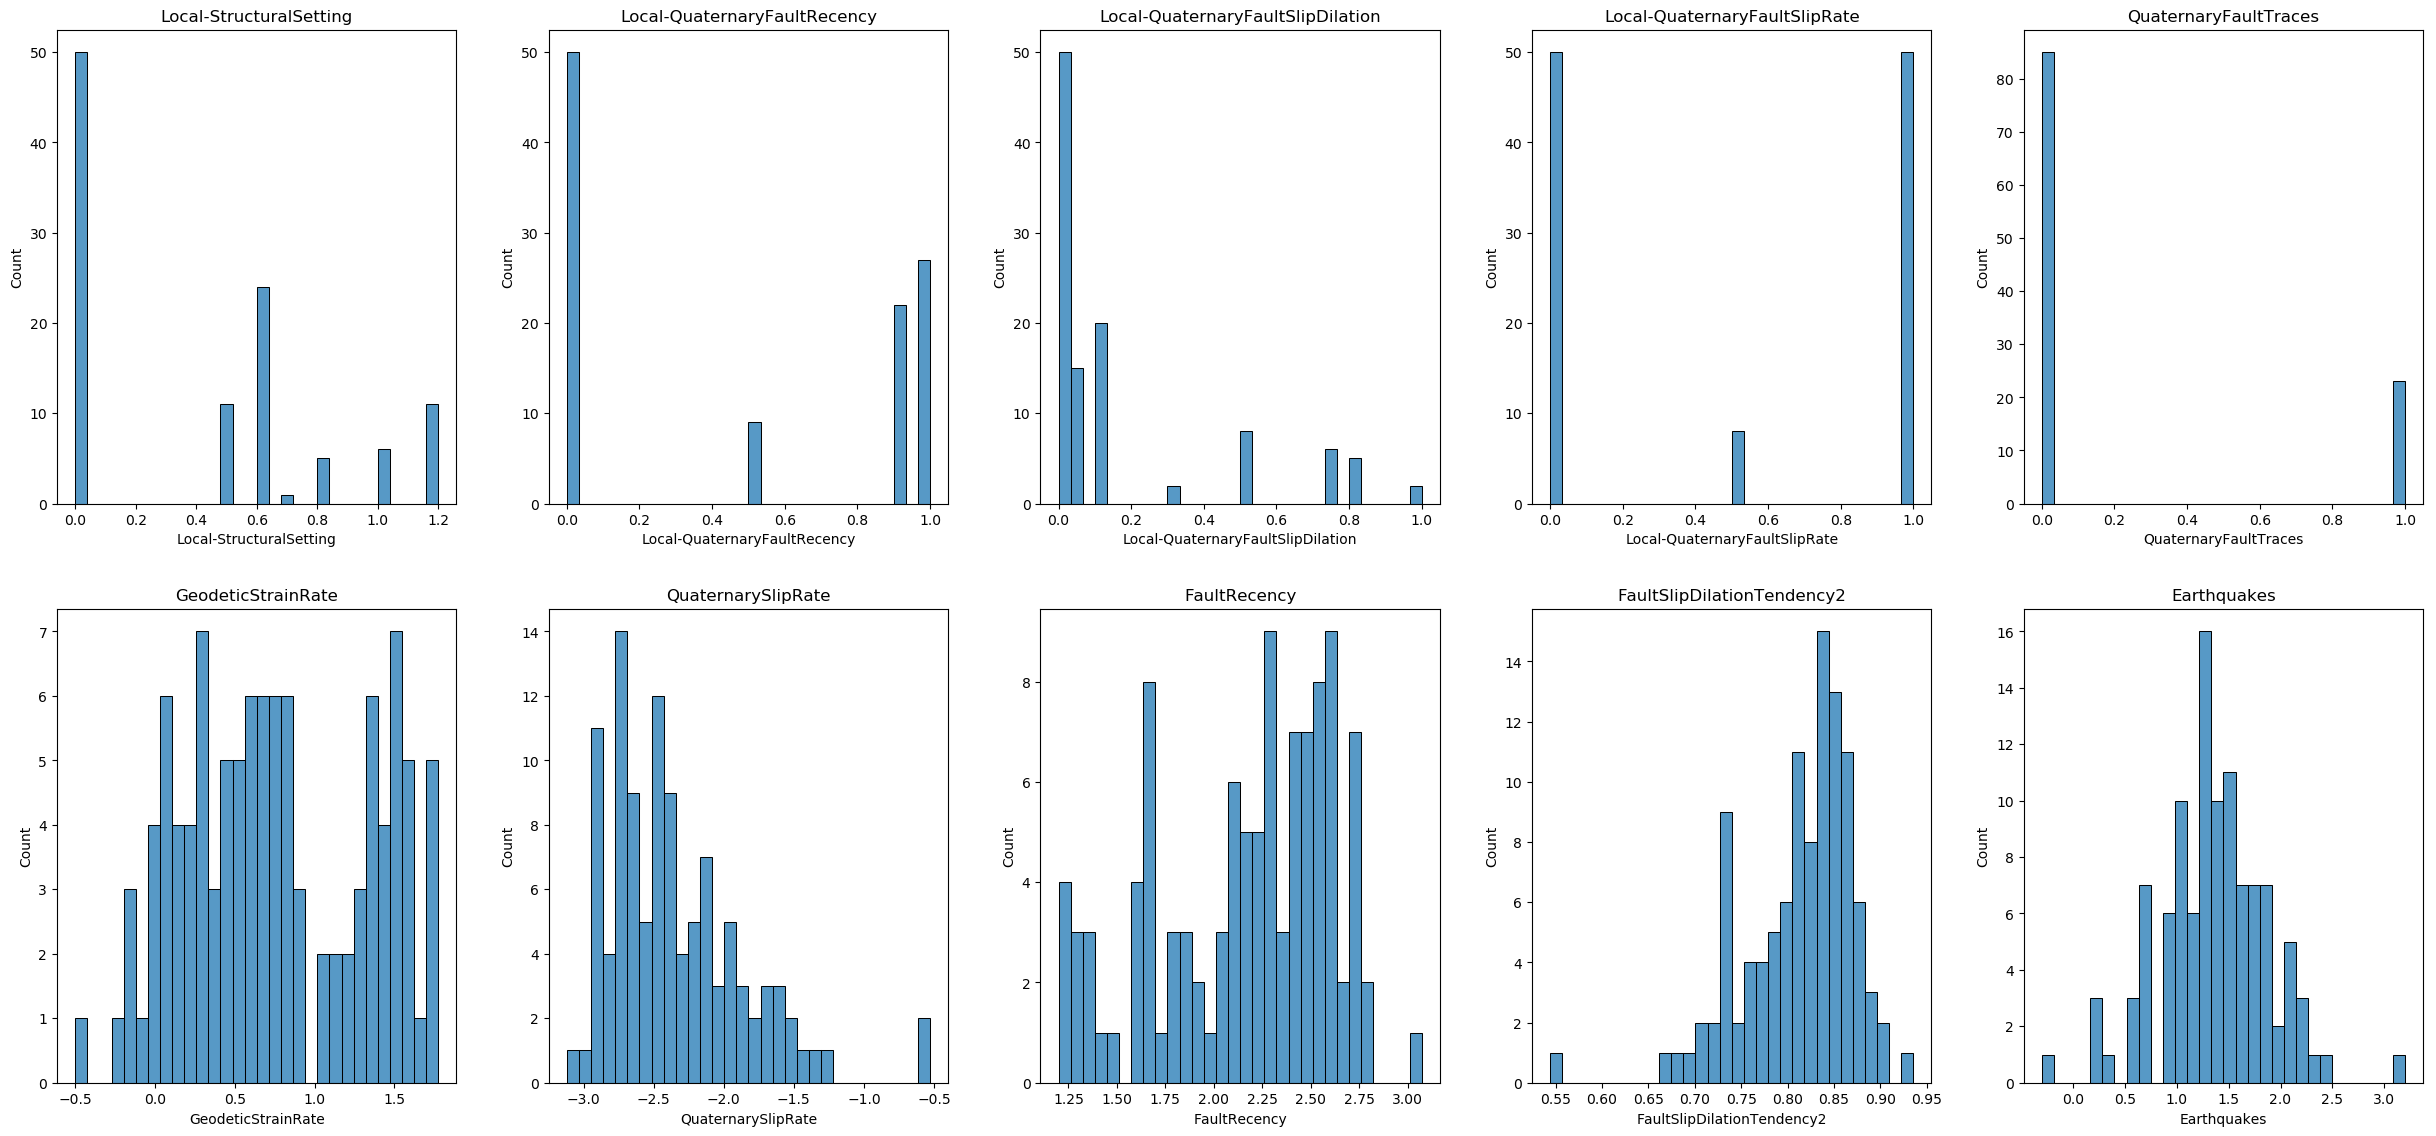

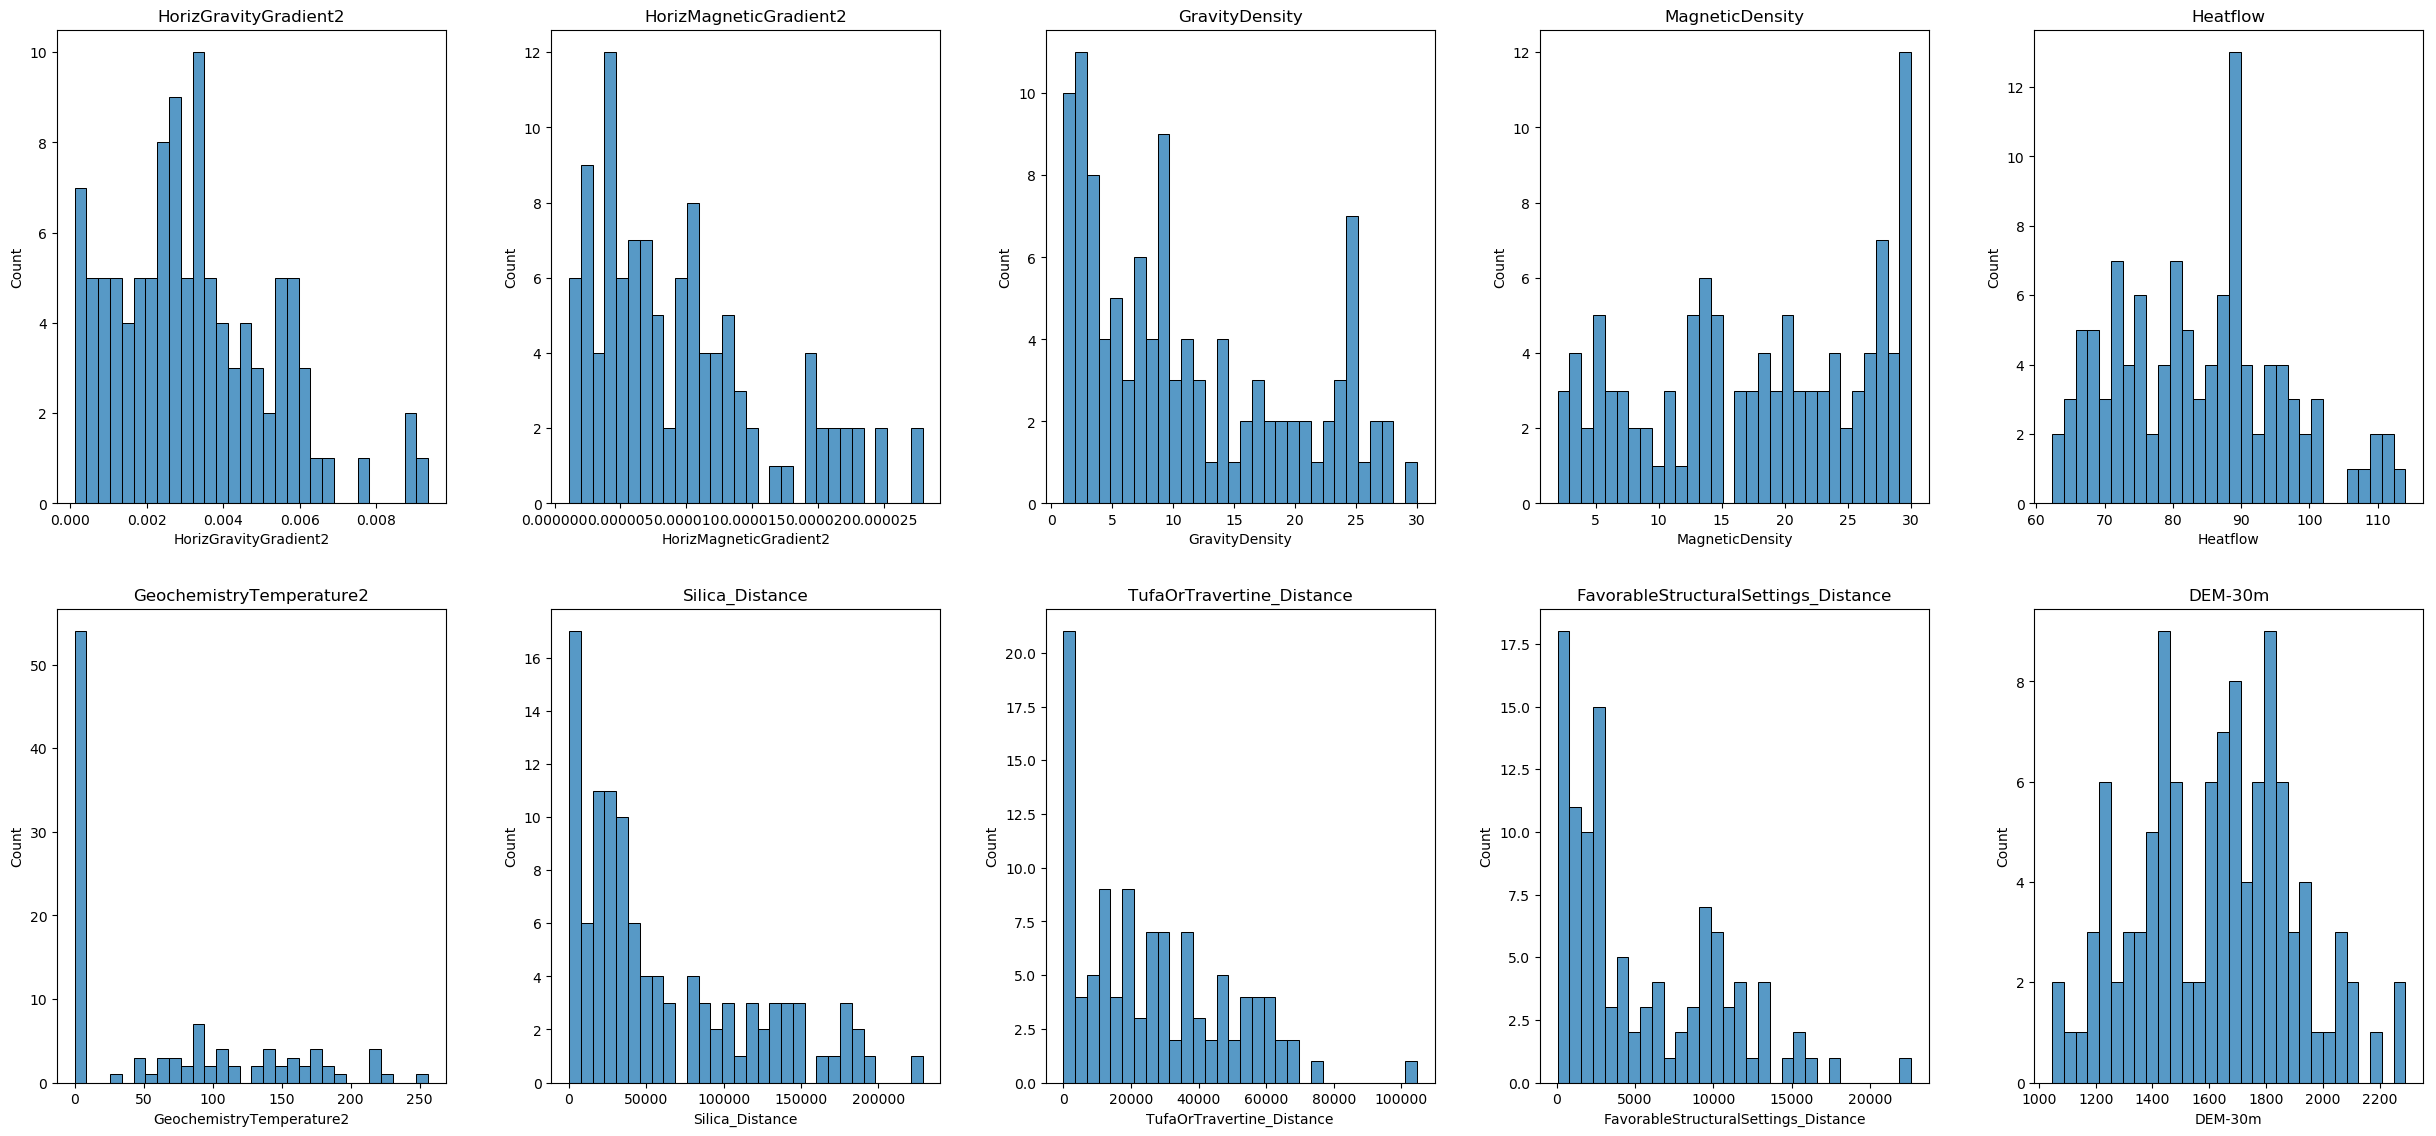

In [27]:
# Checking the total number of features
num_features = X_train_imputed.shape[1]  # Total number of features
n_figure = 5  # Subfigures in a row
n_rows_first_fig = 2  # Number of rows in the first figure

# Calculate rows for each figure
num_rows_first = n_rows_first_fig * n_figure
num_rows_second = (num_features - num_rows_first)

# First Figure
plt.figure(figsize=(25, 12))  # Adjust the figure size as needed
for i, column in enumerate(X_train_imputed.columns[:num_rows_first]):
    plt.subplot(n_rows_first_fig, n_figure, i + 1)
    sns.histplot(X_train_imputed[column], kde=False, bins=30)
    plt.title(column)
plt.tight_layout(pad=3.0)  # 'pad' parameter can be adjusted to fit your needs
plt.show()

# Second Figure (if there are any remaining features)
if num_rows_second > 0:
    plt.figure(figsize=(25, 12))  # Adjust the figure size as needed
    for i, column in enumerate(X_train_imputed.columns[num_rows_first:num_features]):
        plt.subplot((num_rows_second // n_figure) + (num_rows_second % n_figure > 0), n_figure, i + 1)
        sns.histplot(X_train_imputed[column], kde=False, bins=30)
        plt.title(column)
    plt.tight_layout(pad=3.0)
    plt.show()

Most of the features are not normally distributed, and some of them have negative values. There are no categorical variables and no binary features. Therefore, we decided to use the Yeo-Johnson method for the transformation and will apply it to all columns. However, users should carefully consider which columns to transform and which methods to use based on their own real-world data.

**Power transformation on training data**  
We initialize the `PowerTransformer` from the `scikit-learn` library with the Yeo-Johnson method, which is chosen because it can handle both positive and negative values in the data. We then fit the power transformer to the imputed training data (`X_train_imputed`) and transform it. This step applies the Yeo-Johnson transformation to all columns, resulting in a transformed array. The transformed data array is then converted back into a new DataFrame, `X_train_transformed`. To maintain consistency with the original data, we ensure that the transformed DataFrame retains the same column names and index as `X_train_imputed`.

In [28]:
# Initialize the PowerTransformer with the Yeo-Johnson method
power_transformer = PowerTransformer(method='yeo-johnson')
# Fit and transform the training data
X_train_transformed_array = power_transformer.fit_transform(X_train_imputed)
# Convert the transformed data back to a DataFrame and retain the original index
X_train_transformed = pd.DataFrame(X_train_transformed_array, columns=X_train_imputed.columns, index=X_train_imputed.index)
# Display the first few rows of the transformed DataFrame
X_train_transformed.head()

,Local-StructuralSetting,Local-QuaternaryFaultRecency,Local-QuaternaryFaultSlipDilation,Local-QuaternaryFaultSlipRate,QuaternaryFaultTraces,GeodeticStrainRate,QuaternarySlipRate,FaultRecency,FaultSlipDilationTendency2,Earthquakes,HorizGravityGradient2,HorizMagneticGradient2,GravityDensity,MagneticDensity,Heatflow,GeochemistryTemperature2,Silica_Distance,TufaOrTravertine_Distance,FavorableStructuralSettings_Distance,DEM-30m
3074,0.663656,0.943075,1.327894,0.138402,-0.520181,0.277903,0.785449,0.695972,-1.024672,0.956918,0.284457,0.399628,0.680634,0.141781,-1.706361,-0.991377,1.252350,-0.070086,0.037062,-0.656698
421527,-1.031652,-1.048244,-0.874505,-1.049506,-0.520181,0.003141,-0.648031,0.866102,0.023722,-0.179173,-0.740154,-0.281699,0.400806,-0.421350,-0.522164,-0.991377,1.546887,1.509931,1.494713,1.564270
915465,-1.031652,-1.048244,-0.874505,-1.049506,-0.520181,-0.724044,-0.995580,1.090720,0.944224,-0.273907,-1.163090,-1.567922,1.264832,0.474749,-1.649041,-0.991377,0.860315,1.296566,0.910351,1.782962
448526,1.537101,1.108122,1.780315,1.027362,-0.520181,0.093291,-0.665964,-0.153521,0.314462,-0.645741,-0.577851,-1.282410,0.296261,0.585041,-0.704082,-0.991377,0.231543,-1.103826,-0.173142,1.474933
1230984,0.462070,1.108122,1.644207,1.027362,1.922408,0.964656,0.517202,-1.149646,0.087317,0.516303,0.210474,-0.220985,0.184658,1.131930,1.106114,0.884366,-0.640500,-0.825638,-0.602388,-1.841091


Now let's visualize the distribution of each feature after the transformation. This visualization will help you understand the distribution of each feature after the power transformation.

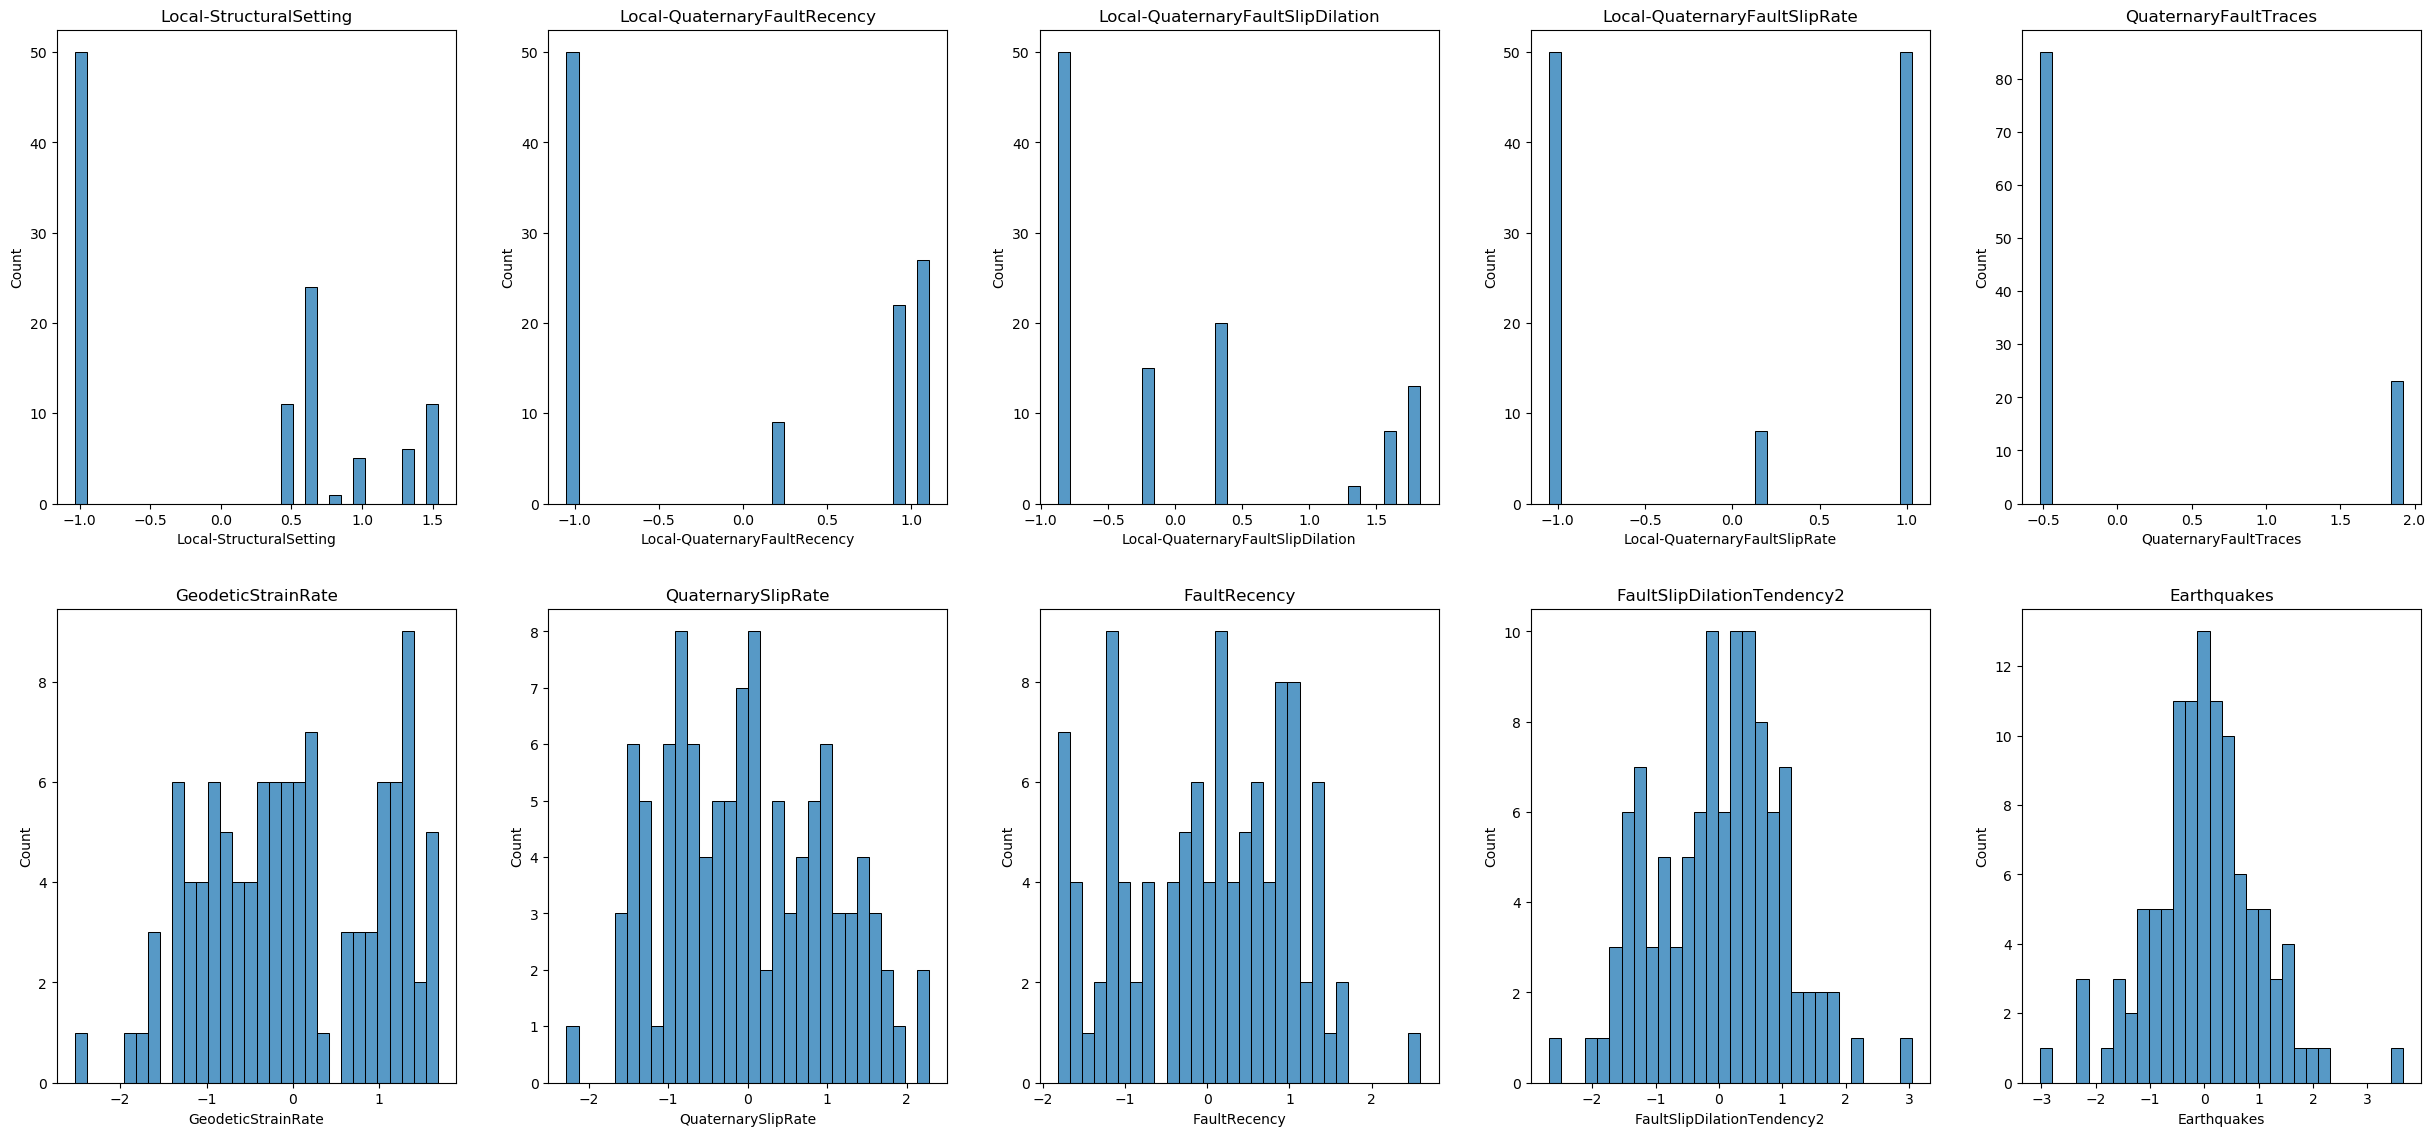

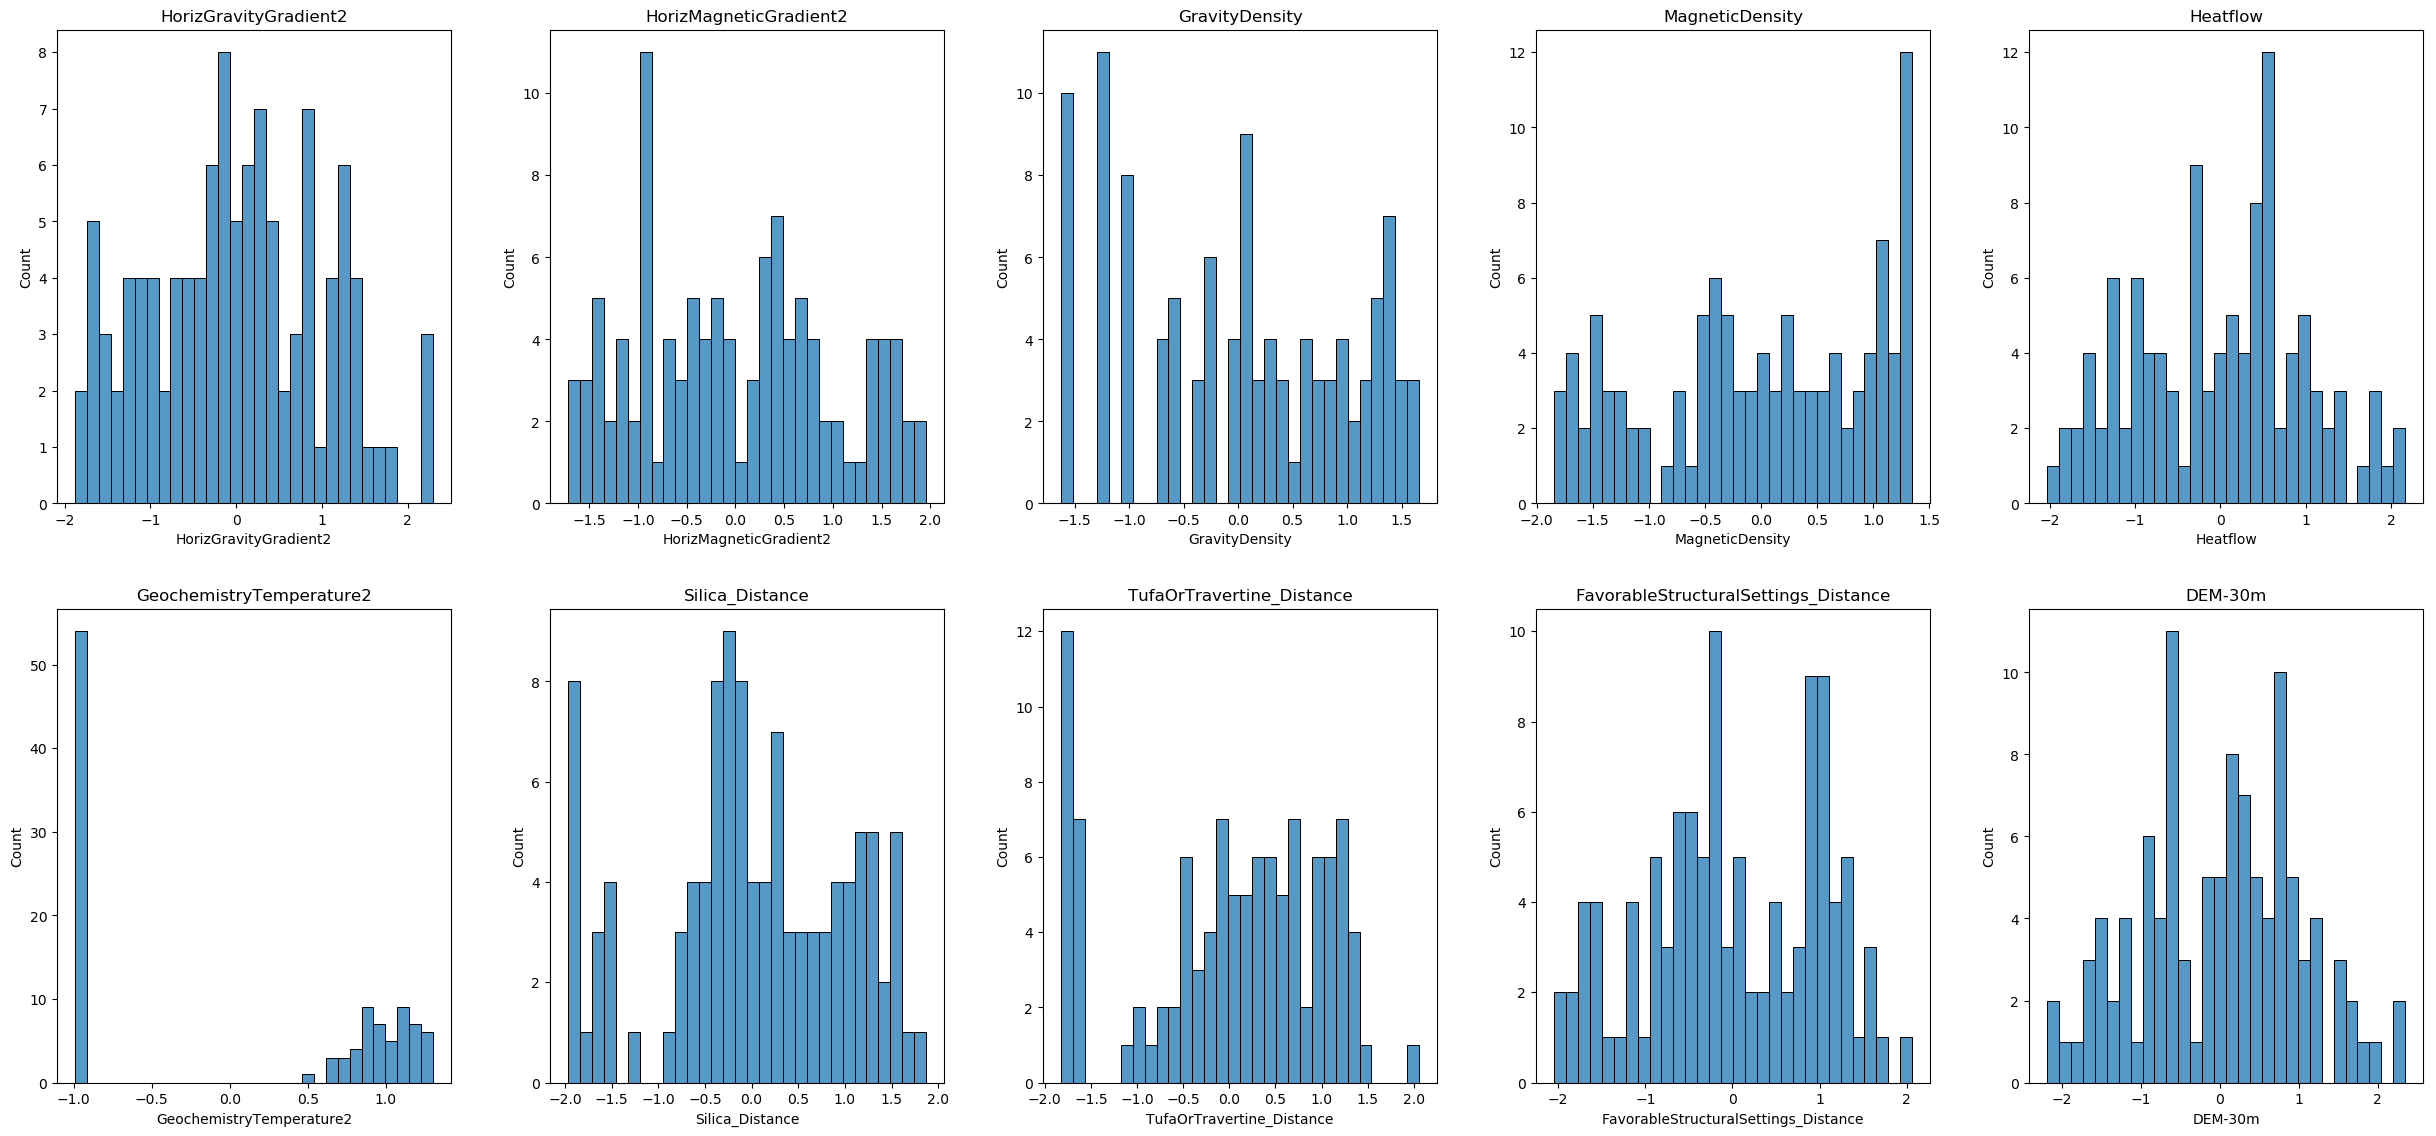

In [29]:
# Checking the total number of features
num_features = X_train_transformed.shape[1]  # Total number of features
n_figure = 5  # Subfigures in a row
n_rows_first_fig = 2  # Number of rows in the first figure

# Calculate rows for each figure
num_rows_first = n_rows_first_fig * n_figure
num_rows_second = (num_features - num_rows_first)

# First Figure
plt.figure(figsize=(25, 12))  # Adjust the figure size as needed
for i, column in enumerate(X_train_transformed.columns[:num_rows_first]):
    plt.subplot(n_rows_first_fig, n_figure, i + 1)
    sns.histplot(X_train_transformed[column], kde=False, bins=30)
    plt.title(column)
plt.tight_layout(pad=3.0)  # 'pad' parameter can be adjusted to fit your needs
plt.show()

# Second Figure (if there are any remaining features)
if num_rows_second > 0:
    plt.figure(figsize=(25, 12))  # Adjust the figure size as needed
    for i, column in enumerate(X_train_transformed.columns[num_rows_first:num_features]):
        plt.subplot((num_rows_second // n_figure) + (num_rows_second % n_figure > 0), n_figure, i + 1)
        sns.histplot(X_train_transformed[column], kde=False, bins=30)
        plt.title(column)
    plt.tight_layout(pad=3.0)
    plt.show()

**Power transformation on testing data**  
Use the transform method of the already fitted `power_transformer` to transform `X_test_imputed` into a new DataFrame, `X_test_transformed`.

In [30]:
# Transform the test data
X_test_transformed_array = power_transformer.transform(X_test_imputed)
X_test_transformed = pd.DataFrame(X_test_transformed_array, columns=X_test_imputed.columns, index=X_test_imputed.index)
X_test_transformed.head()

,Local-StructuralSetting,Local-QuaternaryFaultRecency,Local-QuaternaryFaultSlipDilation,Local-QuaternaryFaultSlipRate,QuaternaryFaultTraces,GeodeticStrainRate,QuaternarySlipRate,FaultRecency,FaultSlipDilationTendency2,Earthquakes,HorizGravityGradient2,HorizMagneticGradient2,GravityDensity,MagneticDensity,Heatflow,GeochemistryTemperature2,Silica_Distance,TufaOrTravertine_Distance,FavorableStructuralSettings_Distance,DEM-30m
1058756,-1.031652,-1.048244,-0.874505,-1.049506,-0.520181,-1.393202,1.793219,-1.057432,0.892955,-0.439477,-0.228176,-0.322898,1.660973,1.348768,0.315159,-0.991377,0.410236,0.790366,1.573296,0.571815
1231875,-1.031652,-1.048244,-0.874505,-1.049506,-0.520181,-1.756251,-0.313534,1.123931,1.473125,-0.919932,-0.641117,1.413890,0.400806,-1.596424,0.513590,-0.991377,0.386623,0.748869,1.334025,1.051761
643481,1.009226,1.108122,1.780315,1.027362,-0.520181,0.847882,-0.258841,-1.167330,0.207976,0.771841,-0.013887,1.405430,-0.969200,-1.353575,0.244818,1.110720,-0.053480,1.184479,0.578270,0.830555
797065,1.295466,1.108122,1.644207,1.027362,-0.520181,1.543196,0.920947,-1.380164,0.819697,1.676043,-0.851587,-1.016445,-0.206273,1.023121,-0.048422,0.936983,-0.053243,1.160137,-0.012250,-1.697864
1633595,1.009226,0.943075,1.644207,1.027362,1.922408,1.299730,1.181492,-0.267157,-1.269206,0.264522,1.434142,-1.567922,-1.253621,0.585041,-0.330477,1.163216,-1.933424,0.119875,-1.425937,-0.720688


**Power transformation on unlabeled data**  
Similarly, use the transform method of the already fitted `power_transformer` to transform `df_unlabeled_imputed` into a new DataFrame, `df_unlabeled_transformed`.

In [31]:
# Transform the unlabeled data
df_unlabeled_transformed_array = power_transformer.transform(df_unlabeled_imputed)
df_unlabeled_transformed = pd.DataFrame(df_unlabeled_transformed_array, columns=df_unlabeled_imputed.columns, index=df_unlabeled_imputed.index)
df_unlabeled_transformed.head()

,Local-StructuralSetting,Local-QuaternaryFaultRecency,Local-QuaternaryFaultSlipDilation,Local-QuaternaryFaultSlipRate,QuaternaryFaultTraces,GeodeticStrainRate,QuaternarySlipRate,FaultRecency,FaultSlipDilationTendency2,Earthquakes,HorizGravityGradient2,HorizMagneticGradient2,GravityDensity,MagneticDensity,Heatflow,GeochemistryTemperature2,Silica_Distance,TufaOrTravertine_Distance,FavorableStructuralSettings_Distance,DEM-30m
0,-1.031652,-1.048244,-0.874505,-1.049506,-0.520181,1.733628,-0.548536,0.761227,-0.910996,2.638314,-0.930275,-2.069024,1.500788,1.348768,0.221993,-0.991377,0.643047,0.978759,0.779462,1.550544
1,-1.031652,-1.048244,-0.874505,-1.049506,-0.520181,1.733628,-0.548536,0.761227,-0.900708,2.640070,-0.612756,-2.069024,1.444407,1.348768,0.229172,-0.991377,0.642114,0.978201,0.787661,1.409464
2,-1.031652,-1.048244,-0.874505,-1.049506,-0.520181,1.733628,-0.548536,0.761227,-0.847436,2.647032,-0.321673,-2.069024,1.444407,1.348768,0.236003,-0.991377,0.641189,0.977674,0.796727,1.132054
3,-1.031652,-1.048244,-0.874505,-1.049506,-0.520181,1.733628,-0.548536,0.761227,-0.805987,2.640070,-0.122330,-2.069024,1.386366,1.348768,0.242583,-0.991377,0.640272,0.977178,0.806623,1.191245
4,-1.031652,-1.048244,-0.874505,-1.049506,-0.520181,1.733628,-0.534677,0.732936,-0.800485,2.636579,-0.038846,-2.069024,1.386366,1.348768,0.248874,-0.991377,0.639362,0.976713,0.817311,1.312696


<a id="Feature-scaling"></a>
## 8. Feature scaling

Feature scaling is a crucial step in data preprocessing for machine learning. It involves transforming the data so that the features are on a similar scale, which can significantly improve the performance of many algorithms. Feature scaling helps standardize the range of independent variables or features, making it easier for models to learn and interpret the data correctly. Many machine learning algorithms, such as gradient descent-based algorithms (e.g., linear regression, logistic regression), distance-based algorithms (e.g., k-nearest neighbors, k-means clustering), and others (e.g., support vector machines), are sensitive to the scale of the features. Feature scaling ensures that these algorithms perform optimally. Here are some common methods for feature scaling:
* **Standardization (Z-score Normalization)**: Scales the data to have a mean of 0 and a standard deviation of 1.
* **Min-Max Scaling (Normalization)**: Scales the data to a fixed range, usually [0, 1].
* **Robust Scaling**: Scales the data using statistics that are robust to outliers, such as the median and the interquartile range.

**Feature scaling on training data**  
We proceed with feature scaling by initializing a `StandardScaler` from the `scikit-learn` library. The scaler is then fitted to the transformed training data (`X_train_transformed`) and applied to scale it. The scaled data array is converted back into a DataFrame, `X_train_scaled`, which also retains the original column names and index. This ensures the data remain consistent and ready for subsequent modeling steps.  
Here is the complete code snippet for the scaling process:

In [32]:
# Initialize the scaler
scaler = StandardScaler()
# Fit and transform the training data
X_train_scaled_array = scaler.fit_transform(X_train_transformed)
# Convert the scaled data back to a DataFrame and retain the original index
X_train_scaled = pd.DataFrame(X_train_scaled_array, columns=X_train_transformed.columns, index=X_train_transformed.index)
# Display the first few rows of the scaled DataFrame
X_train_scaled.head()

,Local-StructuralSetting,Local-QuaternaryFaultRecency,Local-QuaternaryFaultSlipDilation,Local-QuaternaryFaultSlipRate,QuaternaryFaultTraces,GeodeticStrainRate,QuaternarySlipRate,FaultRecency,FaultSlipDilationTendency2,Earthquakes,HorizGravityGradient2,HorizMagneticGradient2,GravityDensity,MagneticDensity,Heatflow,GeochemistryTemperature2,Silica_Distance,TufaOrTravertine_Distance,FavorableStructuralSettings_Distance,DEM-30m
3074,0.663656,0.943075,1.327894,0.138402,-0.520181,0.277903,0.785449,0.695972,-1.024672,0.956918,0.284457,0.399628,0.680634,0.141781,-1.706361,-0.991377,1.252350,-0.070086,0.037062,-0.656698
421527,-1.031652,-1.048244,-0.874505,-1.049506,-0.520181,0.003141,-0.648031,0.866102,0.023722,-0.179173,-0.740154,-0.281699,0.400806,-0.421350,-0.522164,-0.991377,1.546887,1.509931,1.494713,1.564270
915465,-1.031652,-1.048244,-0.874505,-1.049506,-0.520181,-0.724044,-0.995580,1.090720,0.944224,-0.273907,-1.163090,-1.567922,1.264832,0.474749,-1.649041,-0.991377,0.860315,1.296566,0.910351,1.782962
448526,1.537101,1.108122,1.780315,1.027362,-0.520181,0.093291,-0.665964,-0.153521,0.314462,-0.645741,-0.577851,-1.282410,0.296261,0.585041,-0.704082,-0.991377,0.231543,-1.103826,-0.173142,1.474933
1230984,0.462070,1.108122,1.644207,1.027362,1.922408,0.964656,0.517202,-1.149646,0.087317,0.516303,0.210474,-0.220985,0.184658,1.131930,1.106114,0.884366,-0.640500,-0.825638,-0.602388,-1.841091


**Feature scaling on testing data**  
To ensure consistency between the training and testing datasets, we use the scaling method of the already fitted `StandardScaler` to scale the testing data. The `StandardScaler` was previously fitted to the training data, capturing the mean and standard deviation of each feature. We apply this scaler to the transformed testing data (`X_test_transformed`), resulting in a scaled array. This scaled data array is then converted into a new DataFrame, `X_test_scaled`, which retains the original column names and index. This step ensures that the testing data are scaled in the same way as the training data, maintaining consistency for subsequent modeling steps.

In [33]:
# Use the scaling method of the already fitted StandardScaler to scale the testing data
X_test_scaled_array = scaler.transform(X_test_transformed)
# Convert the scaled data back to a DataFrame and retain the original index
X_test_scaled = pd.DataFrame(X_test_scaled_array, columns=X_test_transformed.columns, index=X_test_transformed.index)
# Display the first few rows of the scaled DataFrame
X_test_scaled.head()

,Local-StructuralSetting,Local-QuaternaryFaultRecency,Local-QuaternaryFaultSlipDilation,Local-QuaternaryFaultSlipRate,QuaternaryFaultTraces,GeodeticStrainRate,QuaternarySlipRate,FaultRecency,FaultSlipDilationTendency2,Earthquakes,HorizGravityGradient2,HorizMagneticGradient2,GravityDensity,MagneticDensity,Heatflow,GeochemistryTemperature2,Silica_Distance,TufaOrTravertine_Distance,FavorableStructuralSettings_Distance,DEM-30m
1058756,-1.031652,-1.048244,-0.874505,-1.049506,-0.520181,-1.393202,1.793219,-1.057432,0.892955,-0.439477,-0.228176,-0.322898,1.660973,1.348768,0.315159,-0.991377,0.410236,0.790366,1.573296,0.571815
1231875,-1.031652,-1.048244,-0.874505,-1.049506,-0.520181,-1.756251,-0.313534,1.123931,1.473125,-0.919932,-0.641117,1.413890,0.400806,-1.596424,0.513590,-0.991377,0.386623,0.748869,1.334025,1.051761
643481,1.009226,1.108122,1.780315,1.027362,-0.520181,0.847882,-0.258841,-1.167330,0.207976,0.771841,-0.013887,1.405430,-0.969200,-1.353575,0.244818,1.110720,-0.053480,1.184479,0.578270,0.830555
797065,1.295466,1.108122,1.644207,1.027362,-0.520181,1.543196,0.920947,-1.380164,0.819697,1.676043,-0.851587,-1.016445,-0.206273,1.023121,-0.048422,0.936983,-0.053243,1.160137,-0.012250,-1.697864
1633595,1.009226,0.943075,1.644207,1.027362,1.922408,1.299730,1.181492,-0.267157,-1.269206,0.264522,1.434142,-1.567922,-1.253621,0.585041,-0.330477,1.163216,-1.933424,0.119875,-1.425937,-0.720688


**Feature scaling on unlabelled data**  
We use the already fitted `StandardScaler` to scale the transformed unlabelled data (`df_unlabeled_transformed`). This ensures consistency with the training and testing data. The scaled data are then converted into a new DataFrame, `df_unlabeled_scaled`, retaining the original column names and index.

In [34]:
# Use the scaling method of the already fitted StandardScaler to scale the unlabelled data
df_unlabeled_scaled_array = scaler.transform(df_unlabeled_transformed)
# Convert the scaled data back to a DataFrame and retain the original index
df_unlabeled_scaled = pd.DataFrame(df_unlabeled_scaled_array, columns=df_unlabeled_transformed.columns, index=df_unlabeled_transformed.index)
# Display the first few rows of the scaled DataFrame
df_unlabeled_scaled.head()

,Local-StructuralSetting,Local-QuaternaryFaultRecency,Local-QuaternaryFaultSlipDilation,Local-QuaternaryFaultSlipRate,QuaternaryFaultTraces,GeodeticStrainRate,QuaternarySlipRate,FaultRecency,FaultSlipDilationTendency2,Earthquakes,HorizGravityGradient2,HorizMagneticGradient2,GravityDensity,MagneticDensity,Heatflow,GeochemistryTemperature2,Silica_Distance,TufaOrTravertine_Distance,FavorableStructuralSettings_Distance,DEM-30m
0,-1.031652,-1.048244,-0.874505,-1.049506,-0.520181,1.733628,-0.548536,0.761227,-0.910996,2.638314,-0.930275,-2.069024,1.500788,1.348768,0.221993,-0.991377,0.643047,0.978759,0.779462,1.550544
1,-1.031652,-1.048244,-0.874505,-1.049506,-0.520181,1.733628,-0.548536,0.761227,-0.900708,2.640070,-0.612756,-2.069024,1.444407,1.348768,0.229172,-0.991377,0.642114,0.978201,0.787661,1.409464
2,-1.031652,-1.048244,-0.874505,-1.049506,-0.520181,1.733628,-0.548536,0.761227,-0.847436,2.647032,-0.321673,-2.069024,1.444407,1.348768,0.236003,-0.991377,0.641189,0.977674,0.796727,1.132054
3,-1.031652,-1.048244,-0.874505,-1.049506,-0.520181,1.733628,-0.548536,0.761227,-0.805987,2.640070,-0.122330,-2.069024,1.386366,1.348768,0.242583,-0.991377,0.640272,0.977178,0.806623,1.191245
4,-1.031652,-1.048244,-0.874505,-1.049506,-0.520181,1.733628,-0.534677,0.732936,-0.800485,2.636579,-0.038846,-2.069024,1.386366,1.348768,0.248874,-0.991377,0.639362,0.976713,0.817311,1.312696


**Data visualization**  
Now, let us visualize the distribution of each feature in the finalized dataset.

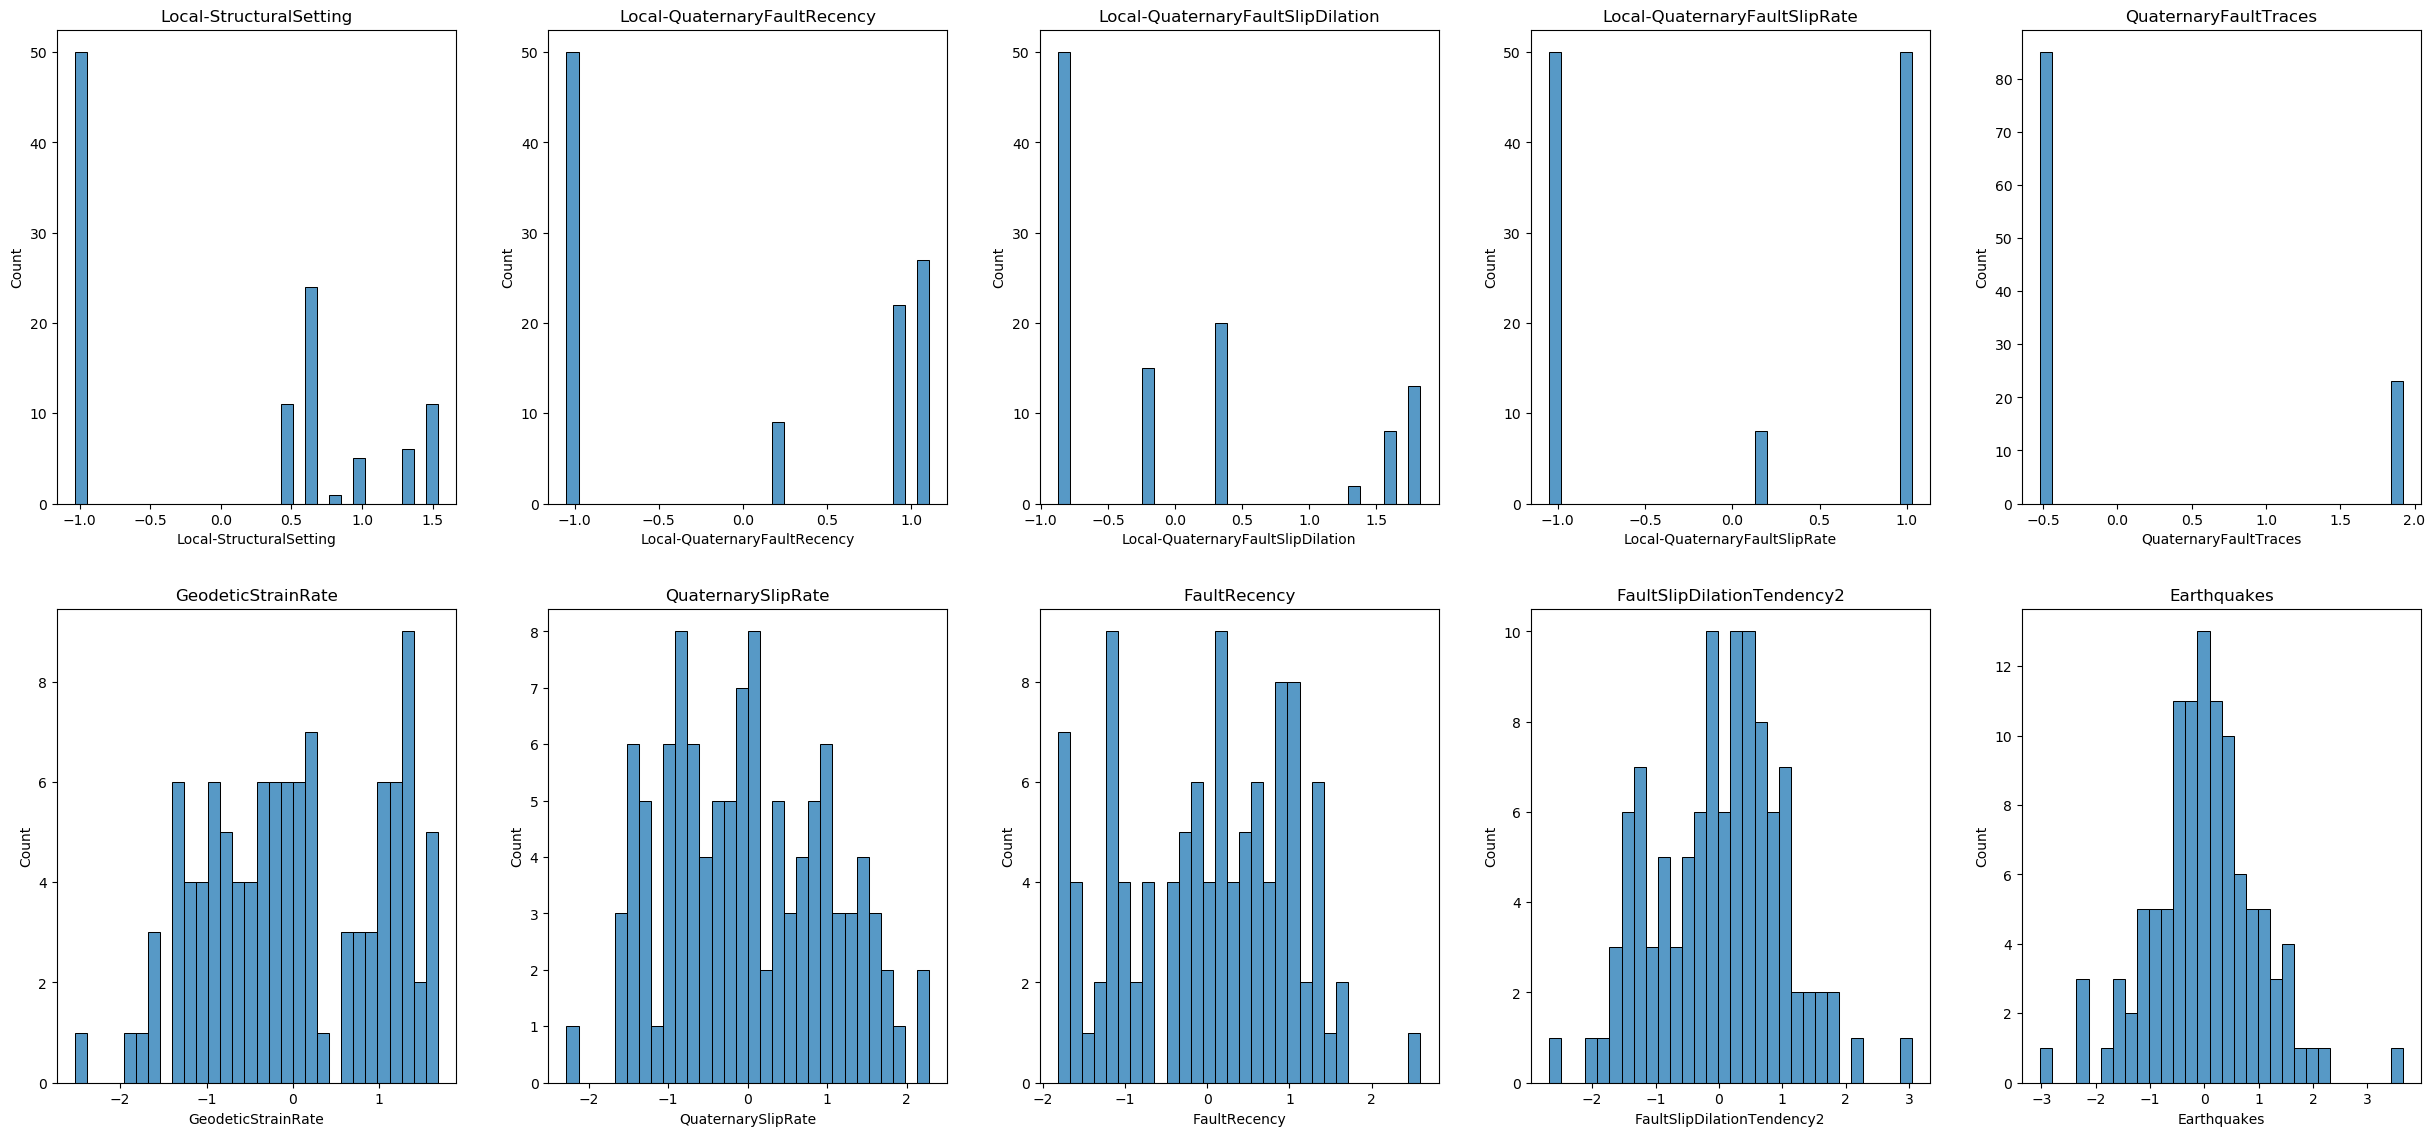

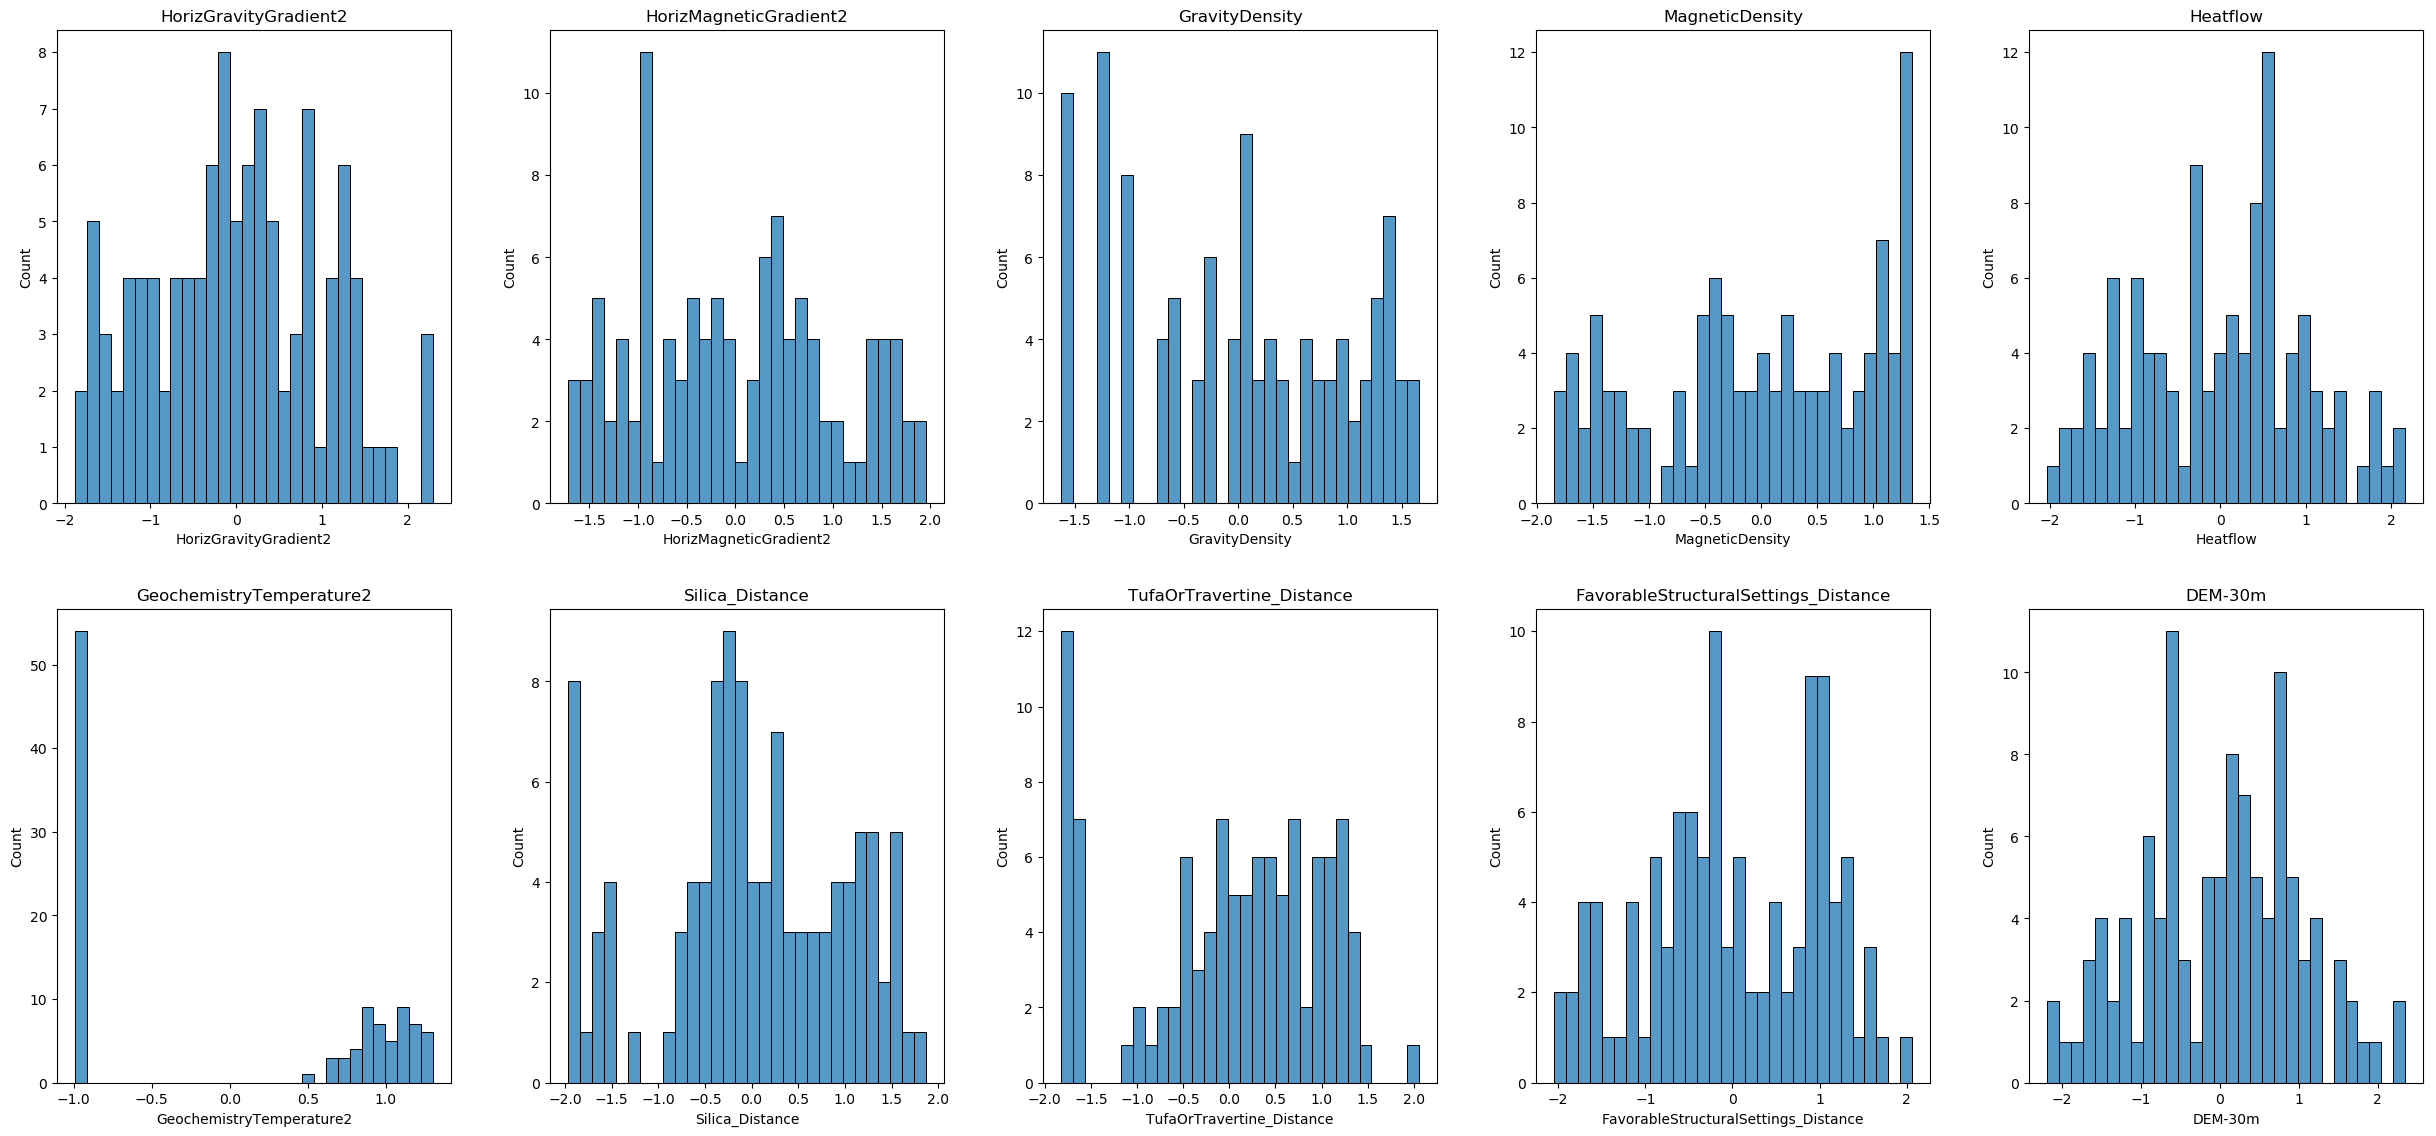

In [35]:
# Checking the total number of features
num_features = X_train_scaled.shape[1]  # Total number of features
n_figure = 5  # Subfigures in a row
n_rows_first_fig = 2  # Number of rows in the first figure

# Calculate rows for each figure
num_rows_first = n_rows_first_fig * n_figure
num_rows_second = (num_features - num_rows_first)

# First Figure
plt.figure(figsize=(25, 12))  # Adjust the figure size as needed
for i, column in enumerate(X_train_scaled.columns[:num_rows_first]):
    plt.subplot(n_rows_first_fig, n_figure, i + 1)
    sns.histplot(X_train_scaled[column], kde=False, bins=30)
    plt.title(column)
plt.tight_layout(pad=3.0)  # 'pad' parameter can be adjusted to fit your needs
plt.show()

# Second Figure (if there are any remaining features)
if num_rows_second > 0:
    plt.figure(figsize=(25, 12))  # Adjust the figure size as needed
    for i, column in enumerate(X_train_scaled.columns[num_rows_first:num_features]):
        plt.subplot((num_rows_second // n_figure) + (num_rows_second % n_figure > 0), n_figure, i + 1)
        sns.histplot(X_train_scaled[column], kde=False, bins=30)
        plt.title(column)
    plt.tight_layout(pad=3.0)
    plt.show()

<a id="Renaming-and-saving-the-final-data"></a>
## 9. Renaming and saving the final data

After completing all preprocessing steps, the final datasets need to be appropriately renamed and saved for future use. This step ensures that the preprocessed data are well-organized and easily accessible for subsequent analysis or modeling tasks. By saving all datasets in a single HDF5 file, we can keep them together in a structured format, making data management more efficient.
In this process, we:
1. Rename the preprocessed datasets for clarity.
2. Specify the directory and file name for saving the data.
3. Save all datasets into a single HDF5 file with different keys, ensuring they are stored together but can be accessed individually.

In [36]:
# The variables after preprocessing are:
# X_train_scaled, X_test_scaled, y_train, y_test, df_unlabeled_scaled

# Rename the preprocessed datasets
X_train_preprocessed = X_train_scaled
X_test_preprocessed = X_test_scaled
X_unlabeled_preprocessed = df_unlabeled_scaled
# Create df_info by excluding the feature columns from df_raw
df_info = df_raw.drop(columns=feature_names)
# Save all datasets to a single HDF5 file with different keys
file_name_final = 'preprocessed_data.h5'
file_path_final = os.path.join(path, file_name_final)
with pd.HDFStore(file_path_final) as store:
    store.put('X_train_preprocessed', X_train_preprocessed)
    store.put('X_test_preprocessed', X_test_preprocessed)
    store.put('y_train', y_train)
    store.put('y_test', y_test)
    store.put('X_unlabeled_preprocessed', X_unlabeled_preprocessed)
    store.put('df_info', df_info)
# Display confirmation message
print("All datasets have been saved to 'preprocessed_data.h5'")

All datasets have been saved to 'preprocessed_data.h5'


## Summary

A picture is worth a thousand words, so I used a flow chart to summarize the entire data preprocessing steps applied to our dataset. Please note that since there is no categorical data in our dataset, the encoding part is illustrated using a different dataset, which is not shown in the figure below. For your own case, be sure to properly handle categorical data if it is present.

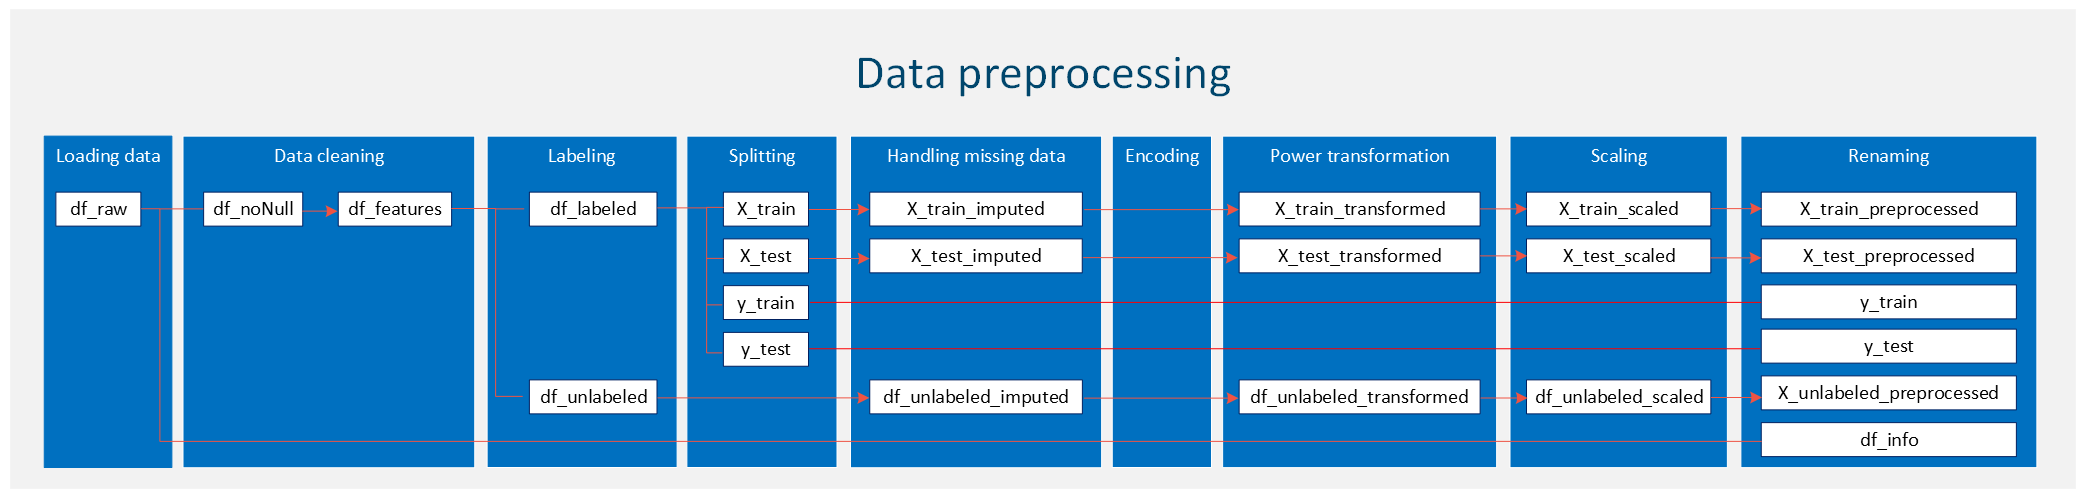